In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!pip install pmdarima
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=14da7abe4d1c3cbd52c39acc60ac98a7261a96ac9a4ad17db06f652892912c0e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB

In [2]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf

In [3]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [4]:
# Load the dataset
data1 = spark.read.csv("/content/drive/MyDrive/DE_Dataset/col_mat_nuw_output.csv", header=False, inferSchema=True)
data2 = spark.read.csv("/content/drive/MyDrive/DE_Dataset/kan_output.csv", header=False, inferSchema=True)
data3 = spark.read.csv("/content/drive/MyDrive/DE_Dataset/mon_kur_jaf_output.csv", header=False, inferSchema=True)

In [5]:
data1.show(5)

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
+--------------------+--------------+----------+----------+


In [6]:
data2.show(5)

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
+--------------------+------------+----------+----------+


In [7]:
data3.show(5)

+--------------------+------------------+----------+----------+
|                 _c0|               _c1|       _c2|       _c3|
+--------------------+------------------+----------+----------+
|                NULL|Bibile, Monaragala|2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
+--------------------+------------------+----------+----------+


In [8]:
# Rename columns for clarity
data1 = data1.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location")\
    .withColumnRenamed("_c2", "Current_Date").withColumnRenamed("_c3", "Next_Date")
data2 = data2.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location")\
    .withColumnRenamed("_c2", "Current_Date").withColumnRenamed("_c3", "Next_Date")
data3 = data3.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location")\
    .withColumnRenamed("_c2", "Current_Date").withColumnRenamed("_c3", "Next_Date")

In [9]:
data1.show(5)

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_Date| Next_Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
+--------------------+--------------+------------+----------+


In [10]:
data2.show(5)

+--------------------+------------+------------+----------+
|        HCHO_reading|    Location|Current_Date| Next_Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
+--------------------+------------+------------+----------+


In [11]:
data3.show(5)

+--------------------+------------------+------------+----------+
|        HCHO_reading|          Location|Current_Date| Next_Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
+--------------------+------------------+------------+----------+


In [12]:
# Concatenate the DataFrames
df = data1.union(data2).union(data3)

In [13]:
df.show()

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_Date| Next_Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [14]:
df.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)


In [15]:
rows_count = df.count()
print("Number of rows:", rows_count)

Number of rows: 12782


In [16]:
from pyspark.sql.functions import col, sum

# Count null values for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show null value counts for each column
null_counts.show()

+------------+--------+------------+---------+
|HCHO_reading|Location|Current_Date|Next_Date|
+------------+--------+------------+---------+
|        4864|       0|           0|        0|
+------------+--------+------------+---------+


In [18]:
# Handling Null values

from pyspark.sql.functions import *
from pyspark.sql.window import Window

# Define window partitioned by 'Location' column
window = Window.partitionBy('Location').orderBy('Current_Date')

# Backward fill
backward_filled_HCHO_reading = first(df['HCHO_reading'], ignorenulls=True).over(window.rowsBetween(0, Window.unboundedFollowing))

# Replace the 'HCHO_reading' column with backward-filled values
df=df.withColumn('HCHO_reading', backward_filled_HCHO_reading)

# Forward fill
forward_filled_HCHO_reading = last(df['HCHO_reading'], ignorenulls=True).over(window.rowsBetween(Window.unboundedPreceding, 0))

# Replace the 'HCHO_reading' column with forward-filled values
df=df.withColumn('HCHO_reading', forward_filled_HCHO_reading)

# Show the result
df.show()

+--------------------+------------------+------------+----------+
|        HCHO_reading|          Location|Current_Date| Next_Date|
+--------------------+------------------+------------+----------+
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|1.420850167050957...|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|9.9528238

In [19]:
# Count null values for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show null value counts for each column
null_counts.show()

+------------+--------+------------+---------+
|HCHO_reading|Location|Current_Date|Next_Date|
+------------+--------+------------+---------+
|           0|       0|           0|        0|
+------------+--------+------------+---------+


In [20]:
df.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)


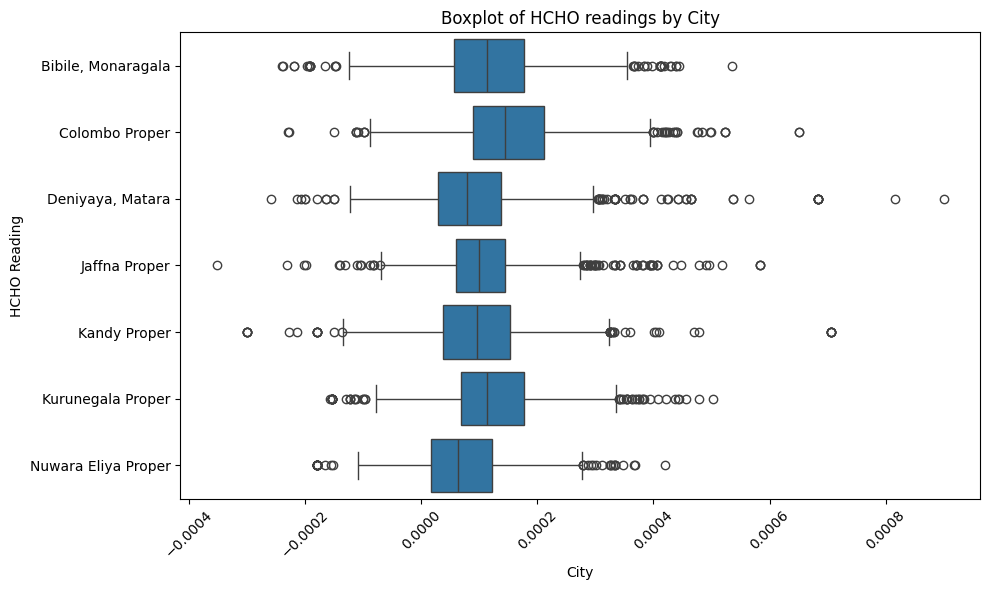

In [23]:
# Identifying outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each city
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.toPandas(), x="HCHO_reading", y="Location")
plt.title("Boxplot of HCHO readings by City")
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Handling outliers using IQR method
from pyspark.sql.functions import col

# List of locations
locations = ['Bibile, Monaragala', 'Colombo Proper', 'Deniyaya, Matara', 'Jaffna Proper', 'Kandy Proper', 'Kurunegala Proper', 'Nuwara Eliya Proper']

# Empty DataFrame to store filtered results
df_filtered = spark.createDataFrame(sc.emptyRDD(), df.schema)

# Apply IQR method to each location
for location in locations:
    # Filter DataFrame for the current location
    df_location = df.filter(col("Location") == location)

    # Calculate quartiles for the current location
    quantiles = df_location.approxQuantile("HCHO_reading", [0.25, 0.75], 0.05)
    q1 = quantiles[0]
    q3 = quantiles[1]
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cap outlier values without removing them
    df_location_capped = df_location.withColumn("HCHO_reading",
                                                 when(col("HCHO_reading") < lower_bound, lower_bound)
                                                 .when(col("HCHO_reading") > upper_bound, upper_bound)
                                                 .otherwise(col("HCHO_reading")))

    # Append capped results to the empty DataFrame
    df_filtered = df_filtered.union(df_location_capped)

# Show the resulting DataFrame
df_filtered.show()

+--------------------+------------------+------------+----------+
|        HCHO_reading|          Location|Current_Date| Next_Date|
+--------------------+------------------+------------+----------+
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|1.420850167050957...|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|9.9528238

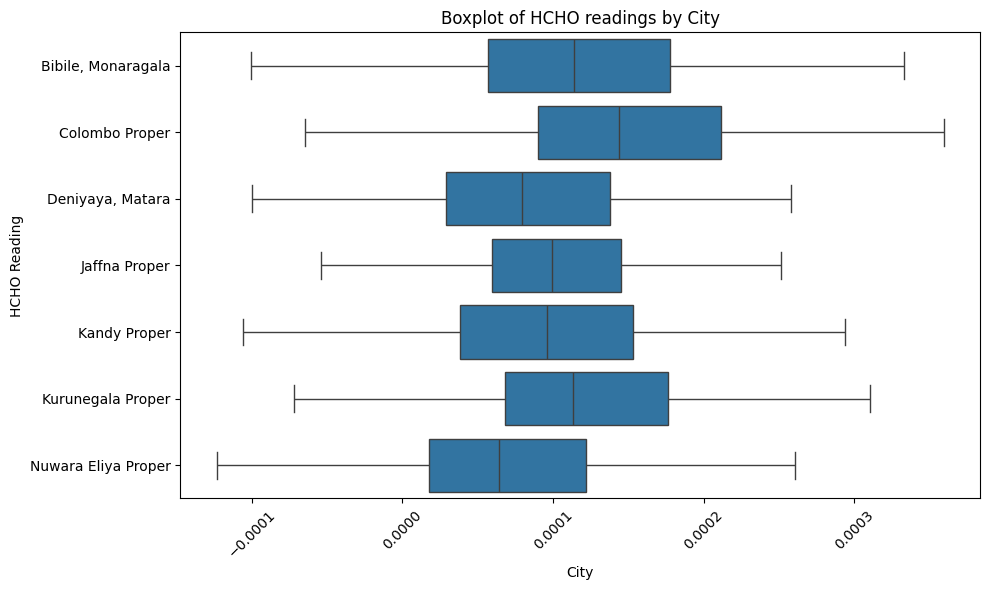

In [25]:
# Checking data distribution after outliers handled

import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each city
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered.toPandas(), x="HCHO_reading", y="Location")
plt.title("Boxplot of HCHO readings by City")
plt.xlabel("City")
plt.ylabel("HCHO Reading")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
rows_count = df_filtered.count()
print("Number of rows:", rows_count)

Number of rows: 12782


In [25]:
df_filtered.describe('HCHO_reading').show()

+-------+--------------------+
|summary|        HCHO_reading|
+-------+--------------------+
|  count|               12782|
|   mean|1.075021429912154...|
| stddev|8.648995502405537E-5|
|    min|-1.23359561118189...|
|    max| 3.59186346017419E-4|
+-------+--------------------+


In [26]:
from pyspark.sql.functions import mean, median, stddev

# Calculate descriptive statistics for each city
city_stats = df_filtered.groupBy("Location").agg(
    mean("HCHO_reading").alias("mean_HCHO"),
    median("HCHO_reading").alias("median_HCHO"),
    stddev("HCHO_reading").alias("stddev_HCHO")
)

# Show descriptive statistics for each city
print("Descriptive Statistics for each city:")
city_stats.show()

Descriptive Statistics for each city:
+-------------------+--------------------+--------------------+--------------------+
|           Location|           mean_HCHO|         median_HCHO|         stddev_HCHO|
+-------------------+--------------------+--------------------+--------------------+
| Bibile, Monaragala|1.180012245749719...|1.138090338532037...|8.914282712384695E-5|
|     Colombo Proper|1.517972267589955...|1.437350140173650...|9.306577078775164E-5|
|   Deniyaya, Matara|8.571720741113839E-5|7.966551476995192E-5|8.077190678726046E-5|
|      Jaffna Proper|1.046341388532473...|9.957104696875889E-5|6.666719492920703E-5|
|       Kandy Proper|9.720393395054452E-5|9.608622488355643E-5|8.691349003278773E-5|
|  Kurunegala Proper|1.222907015534841...|1.134143316690149...|8.111995471041423E-5|
|Nuwara Eliya Proper|7.287056783612621E-5|6.379205298112547E-5|8.121607602731918E-5|
+-------------------+--------------------+--------------------+--------------------+


In [27]:
from pyspark.sql.functions import mean, median, stddev

# Calculate descriptive statistics for each city
city_stats = df_filtered.agg(
    mean("HCHO_reading").alias("mean_HCHO"),
    median("HCHO_reading").alias("median_HCHO"),
    stddev("HCHO_reading").alias("stddev_HCHO")
)

# Show descriptive statistics for each city
print("Descriptive Statistics for the entire Dataset:")
city_stats.show()

Descriptive Statistics for the entire Dataset:
+--------------------+--------------------+--------------------+
|           mean_HCHO|         median_HCHO|         stddev_HCHO|
+--------------------+--------------------+--------------------+
|1.075021429912154...|1.022405582927609E-4|8.648995502405537E-5|
+--------------------+--------------------+--------------------+


In [28]:
df_filtered.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)


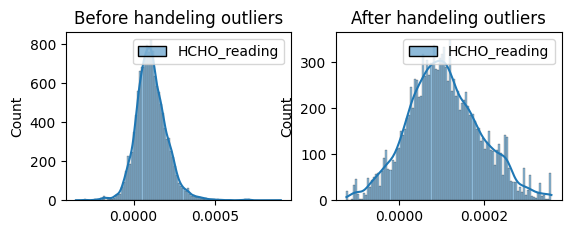

In [29]:
# Plot histograms to check HCHO ditribution
plt.subplot(2, 2, 1)
sns.histplot(data=df.toPandas(), bins=100, kde=True)
plt.title(f'Before handeling outliers')

plt.subplot(2, 2, 2)
sns.histplot(data=df_filtered.toPandas(), bins=100, kde=True)
plt.title(f'After handeling outliers')
plt.show()

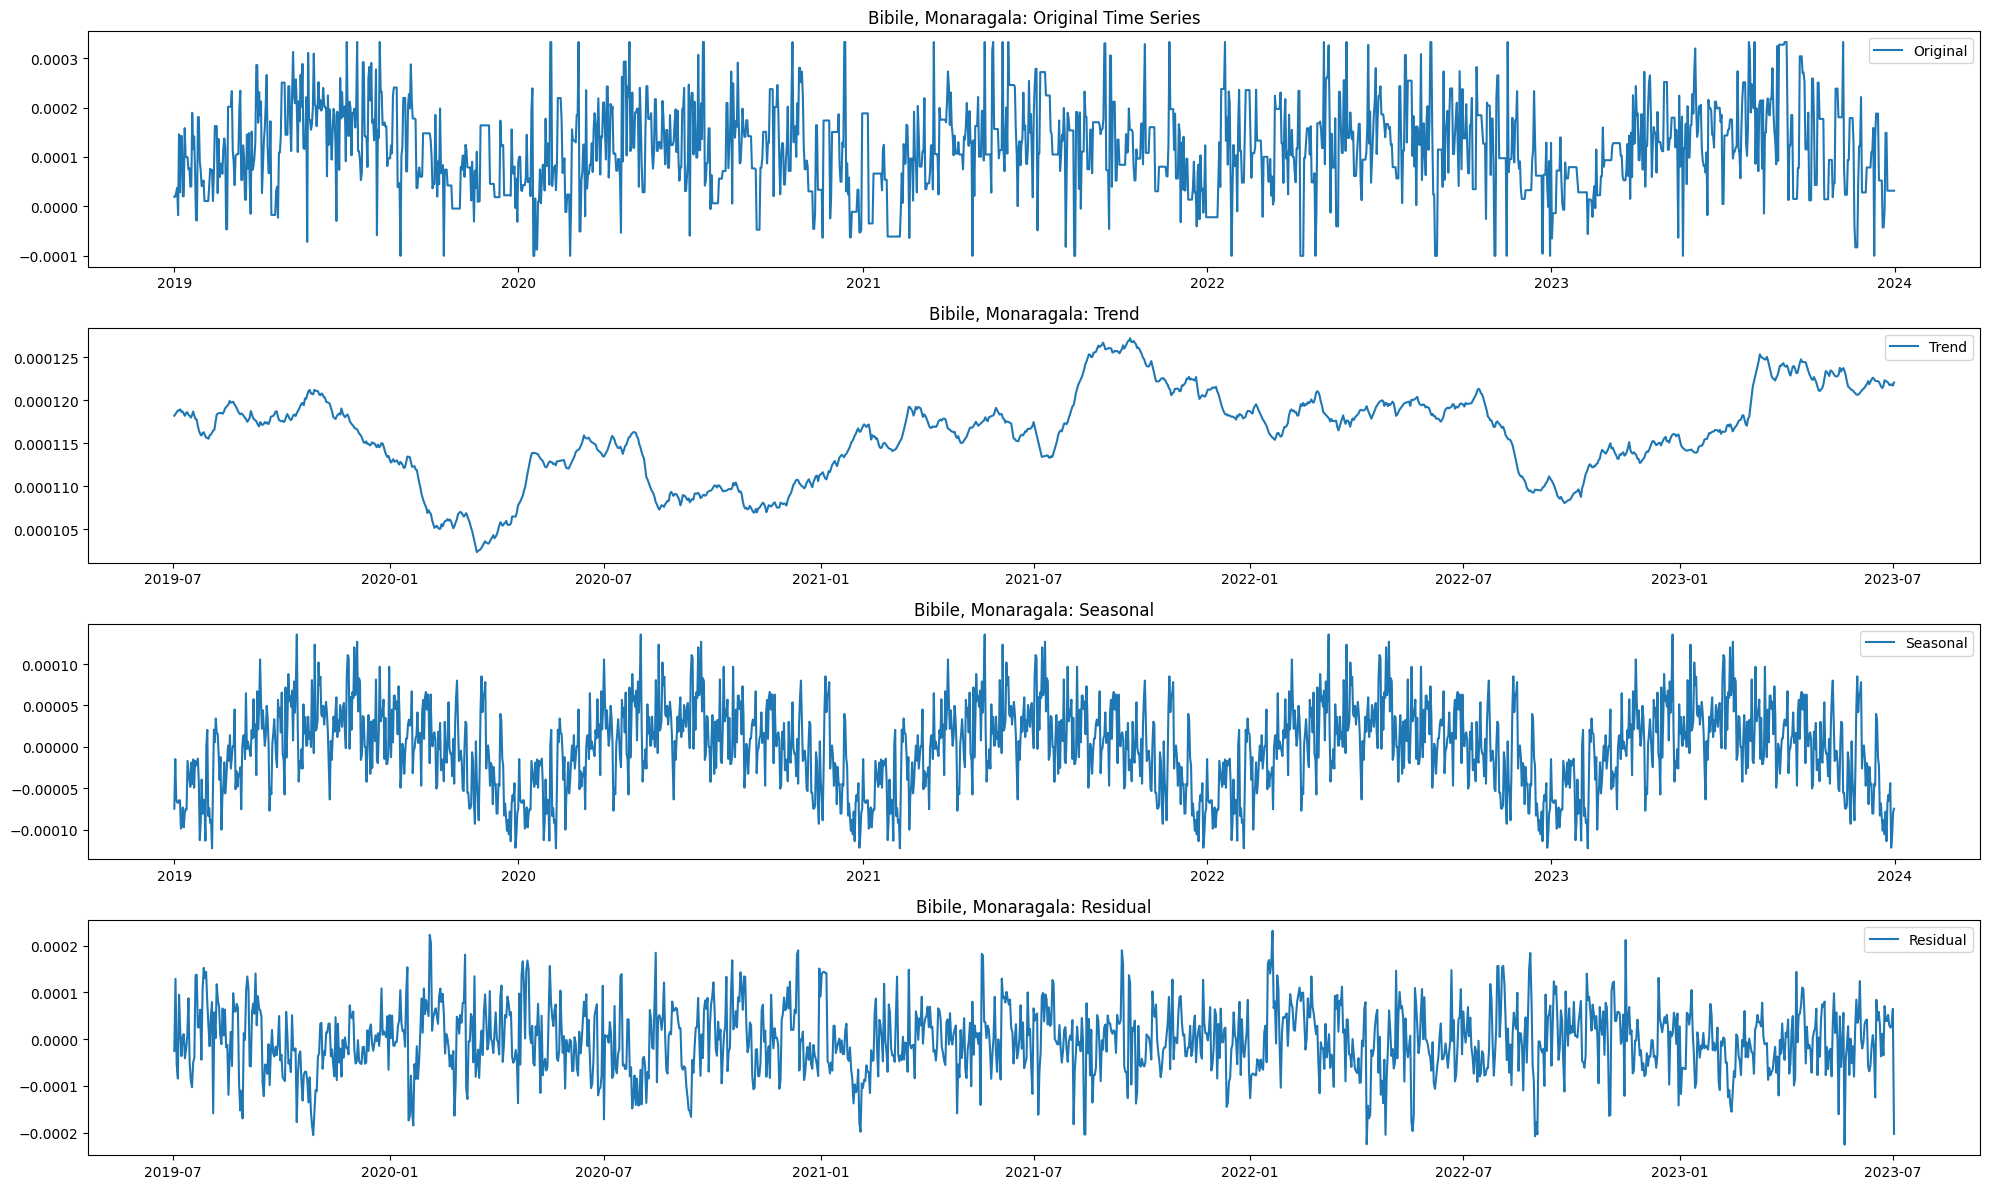

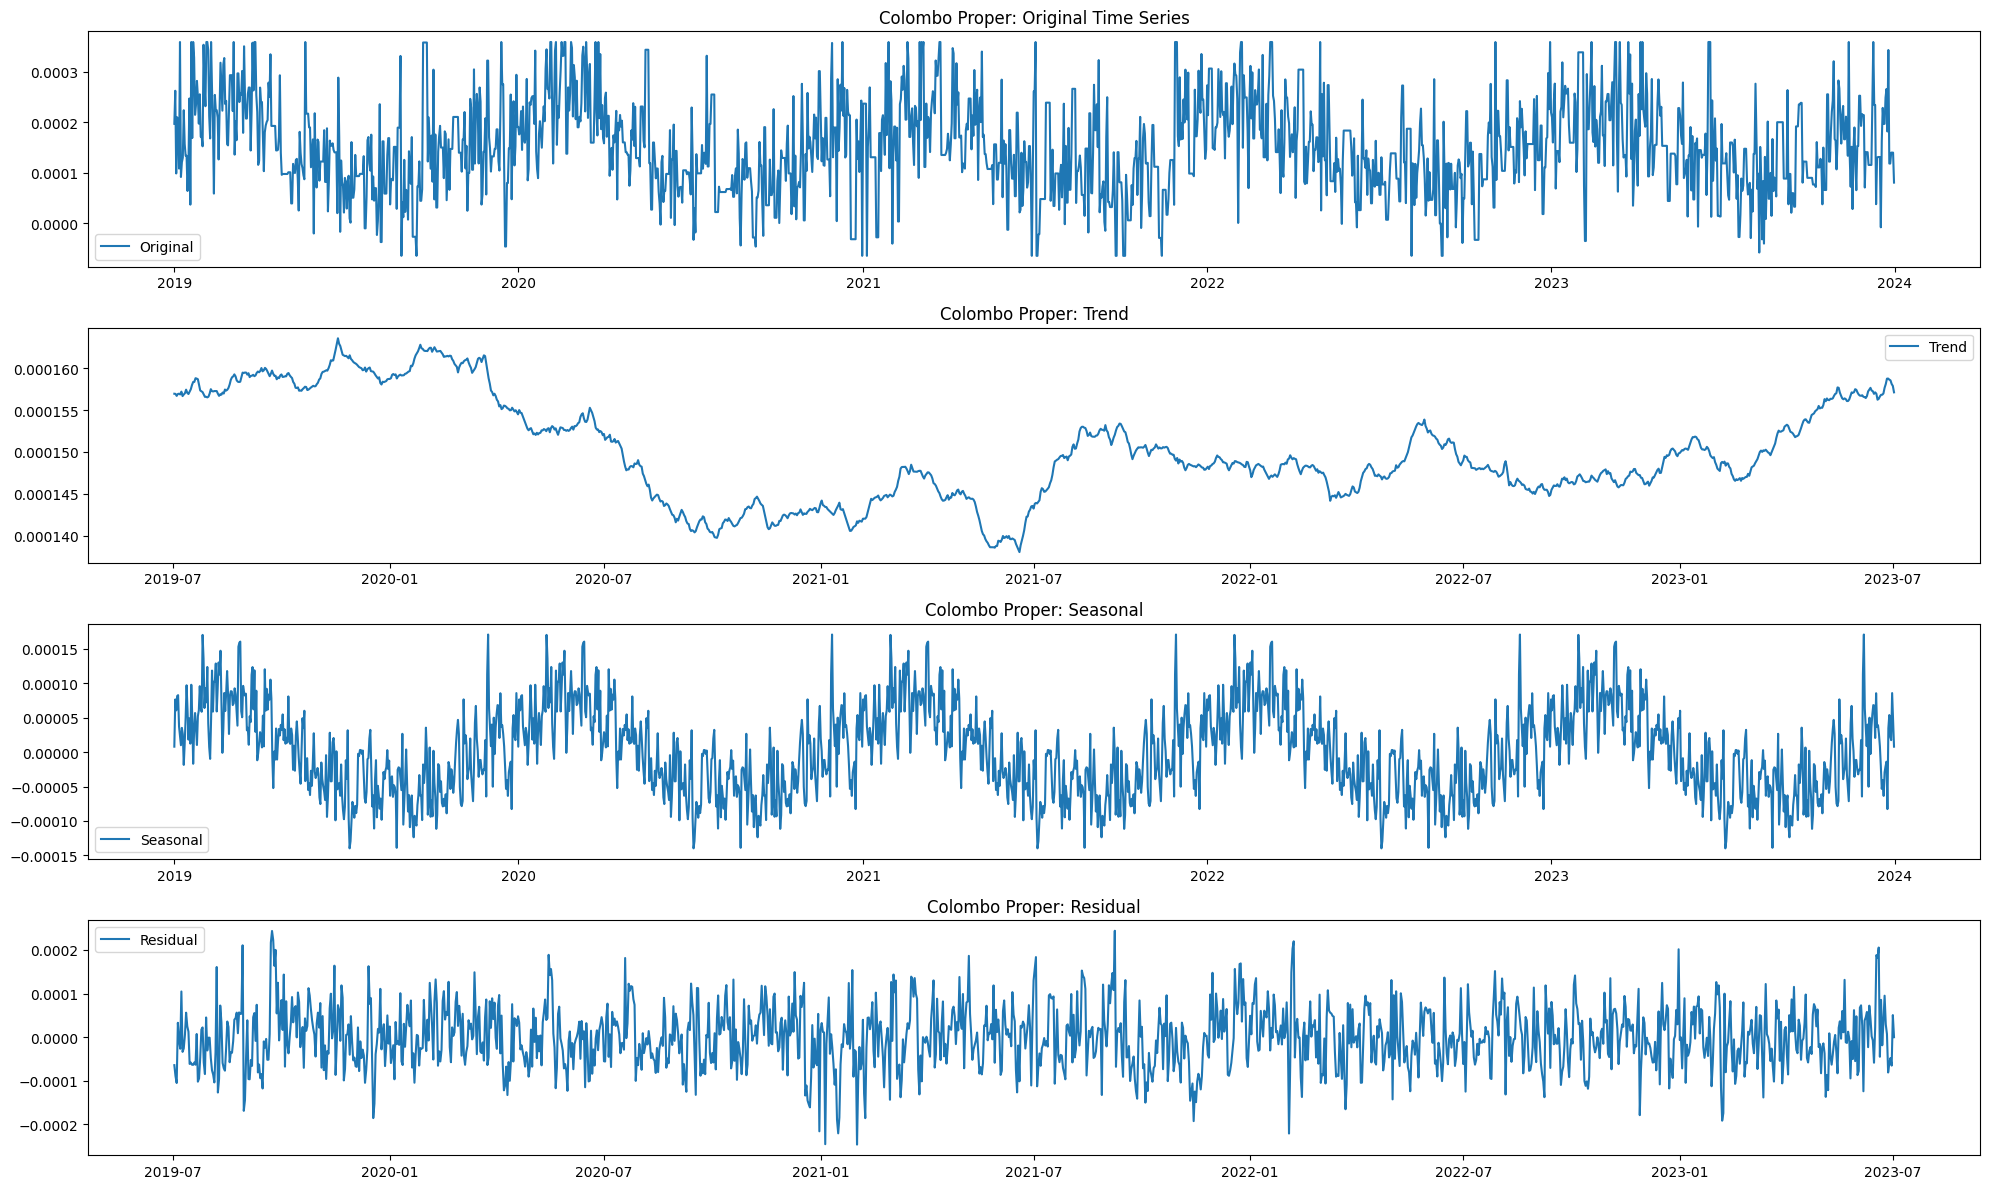

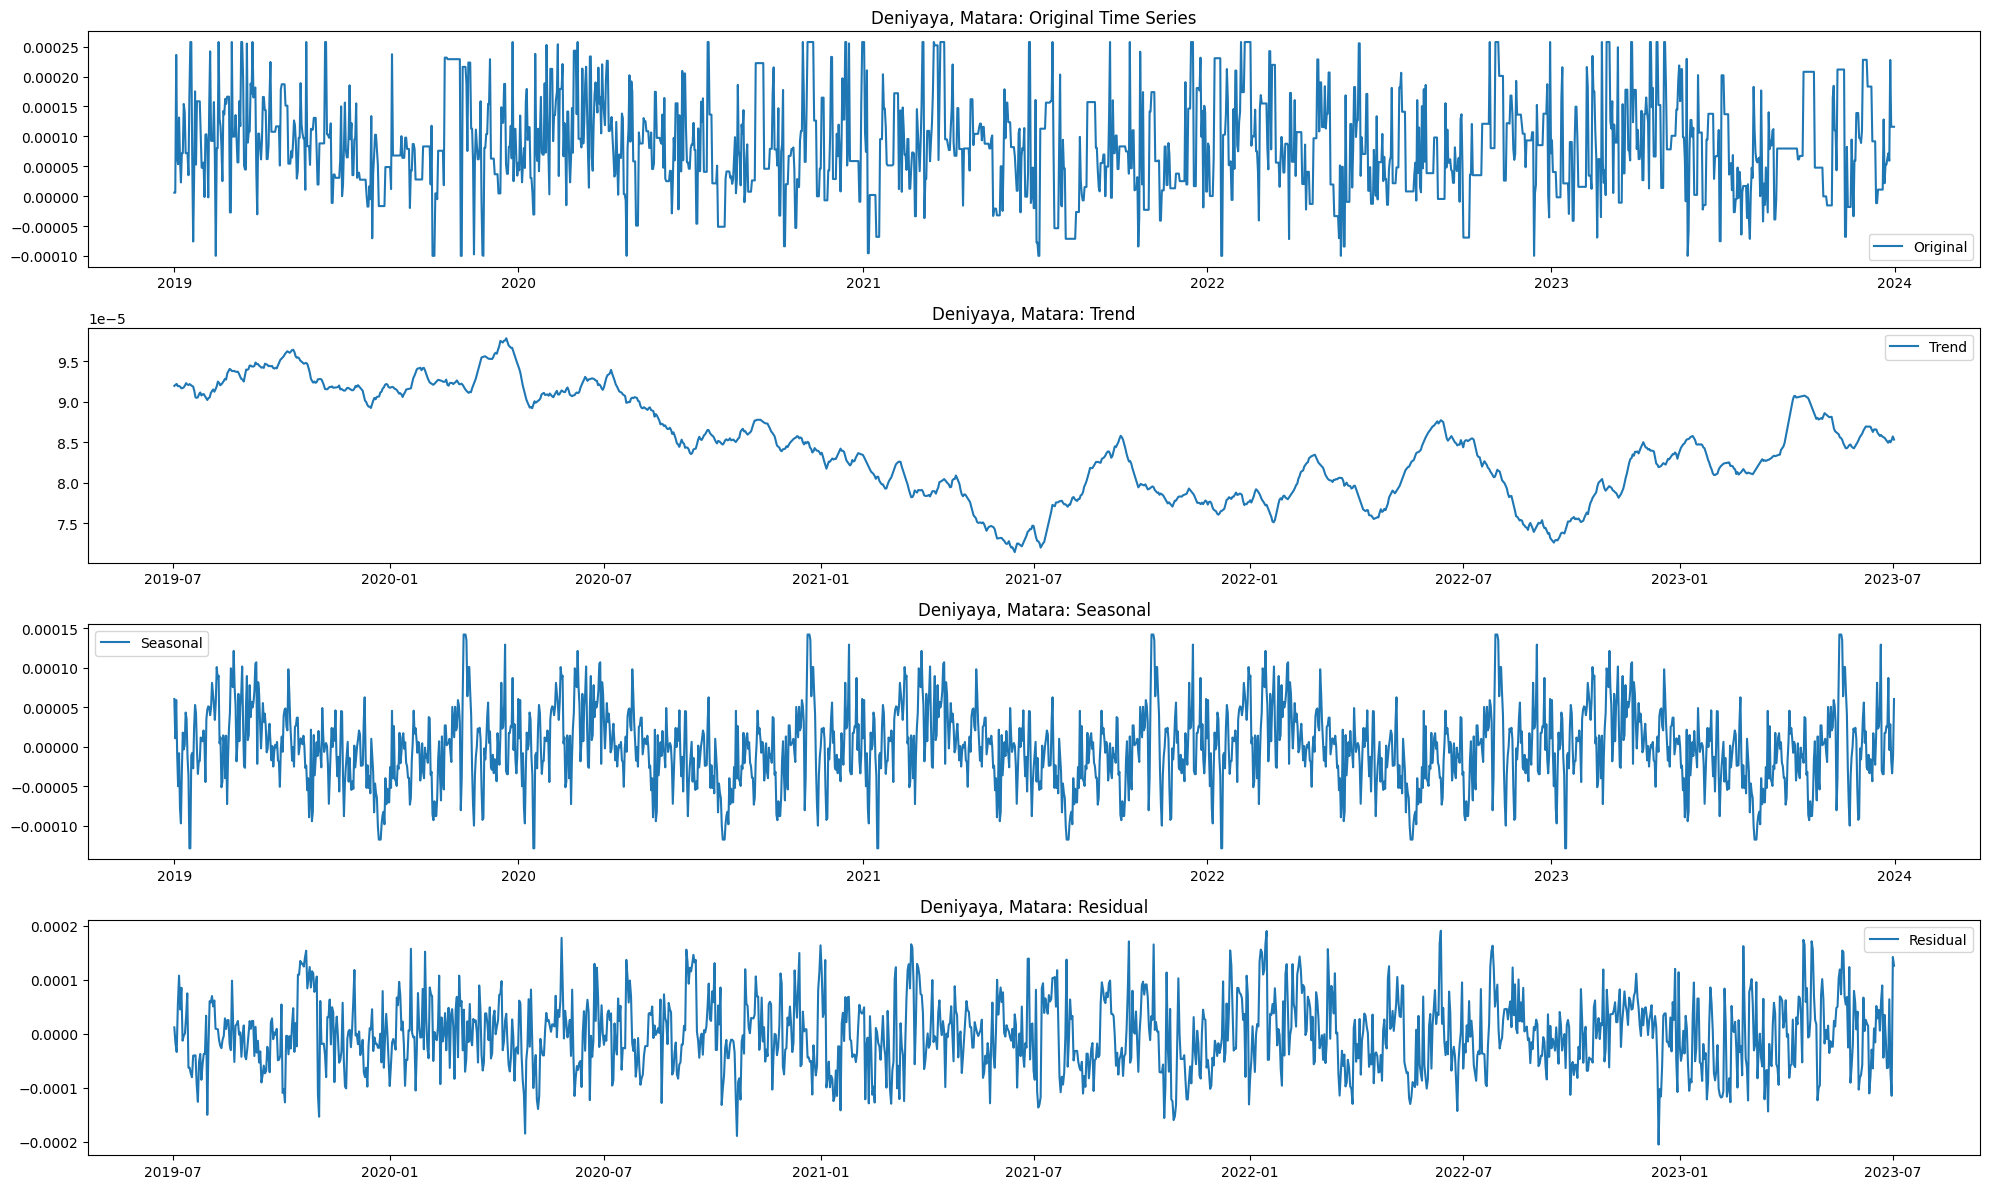

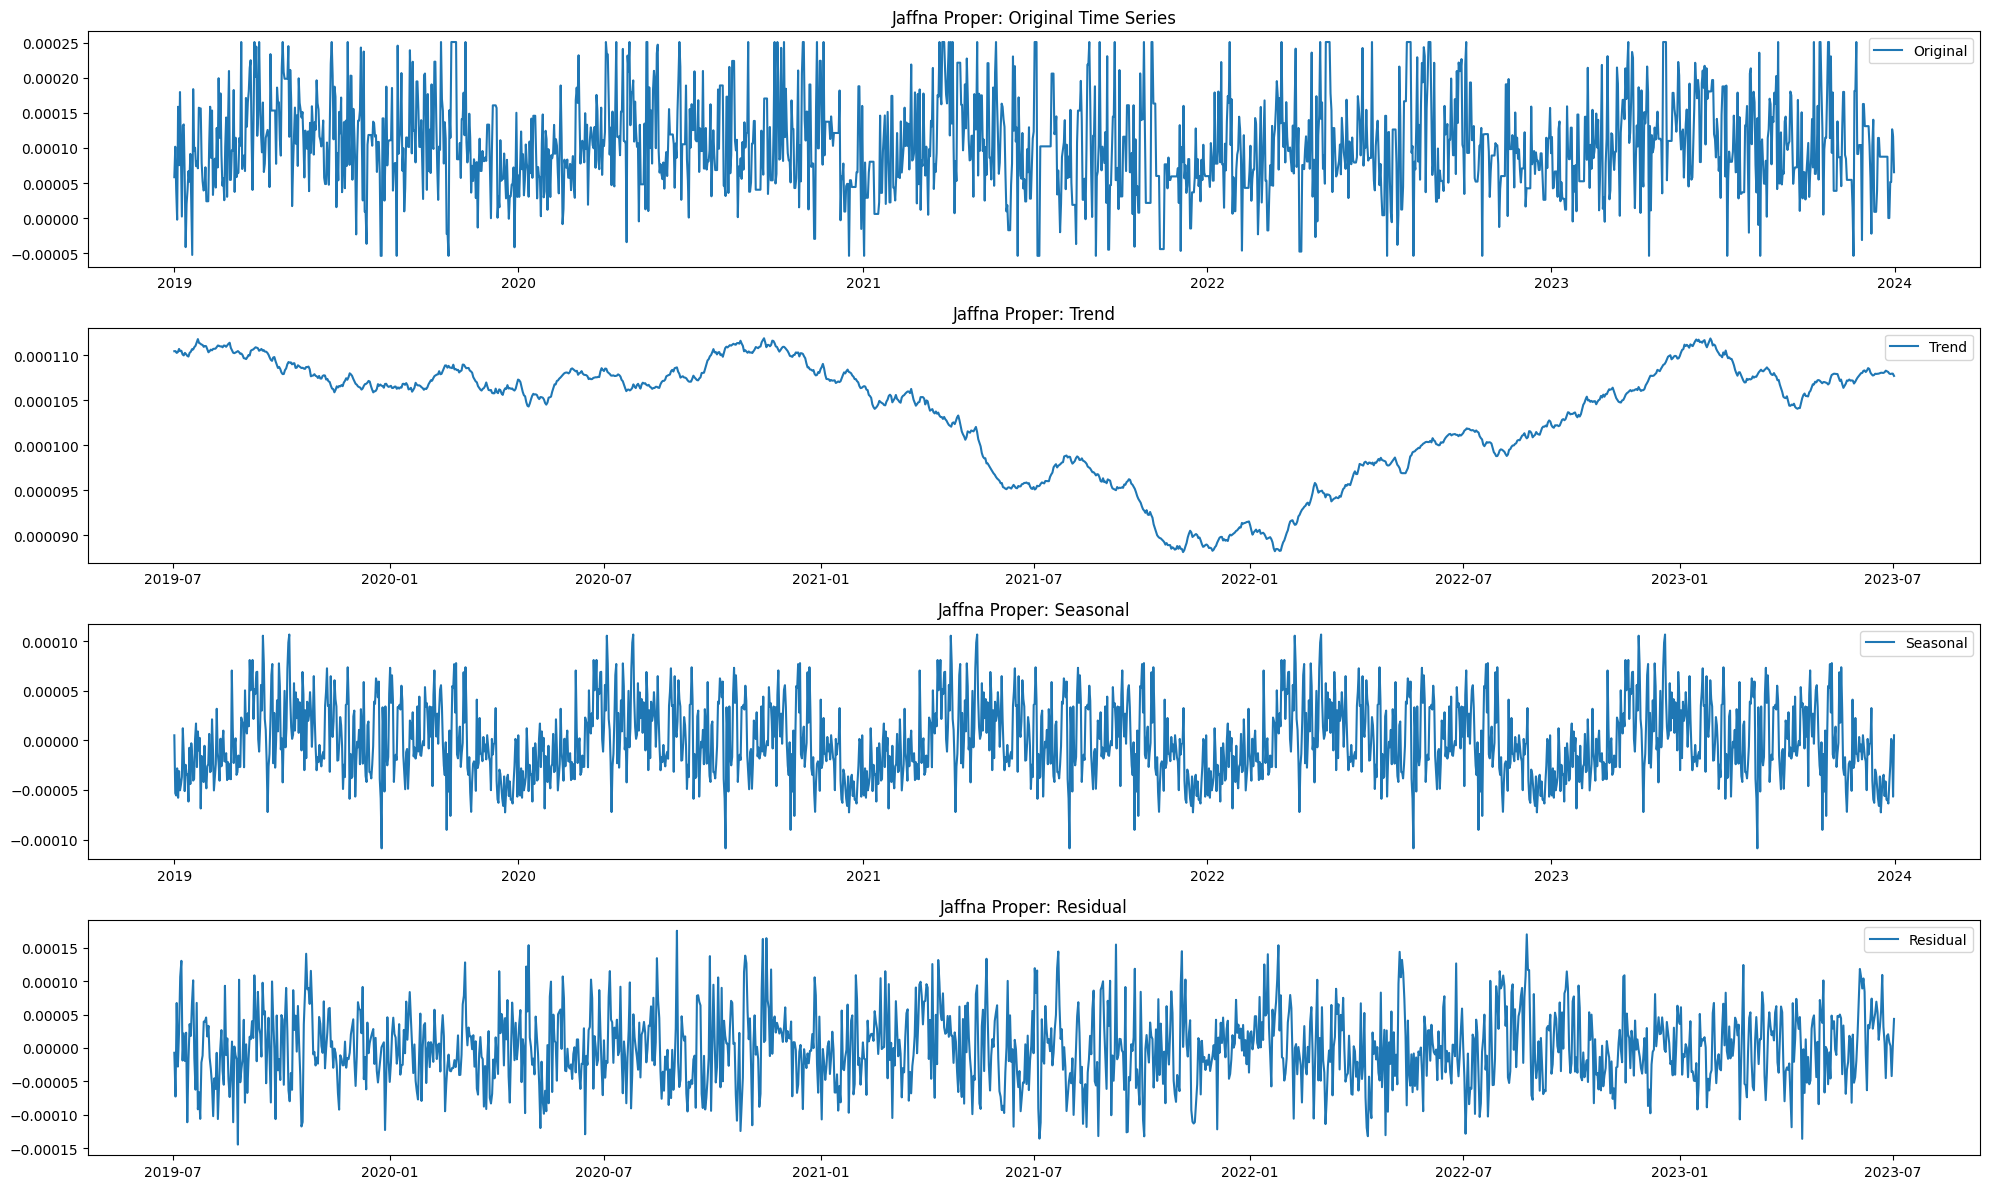

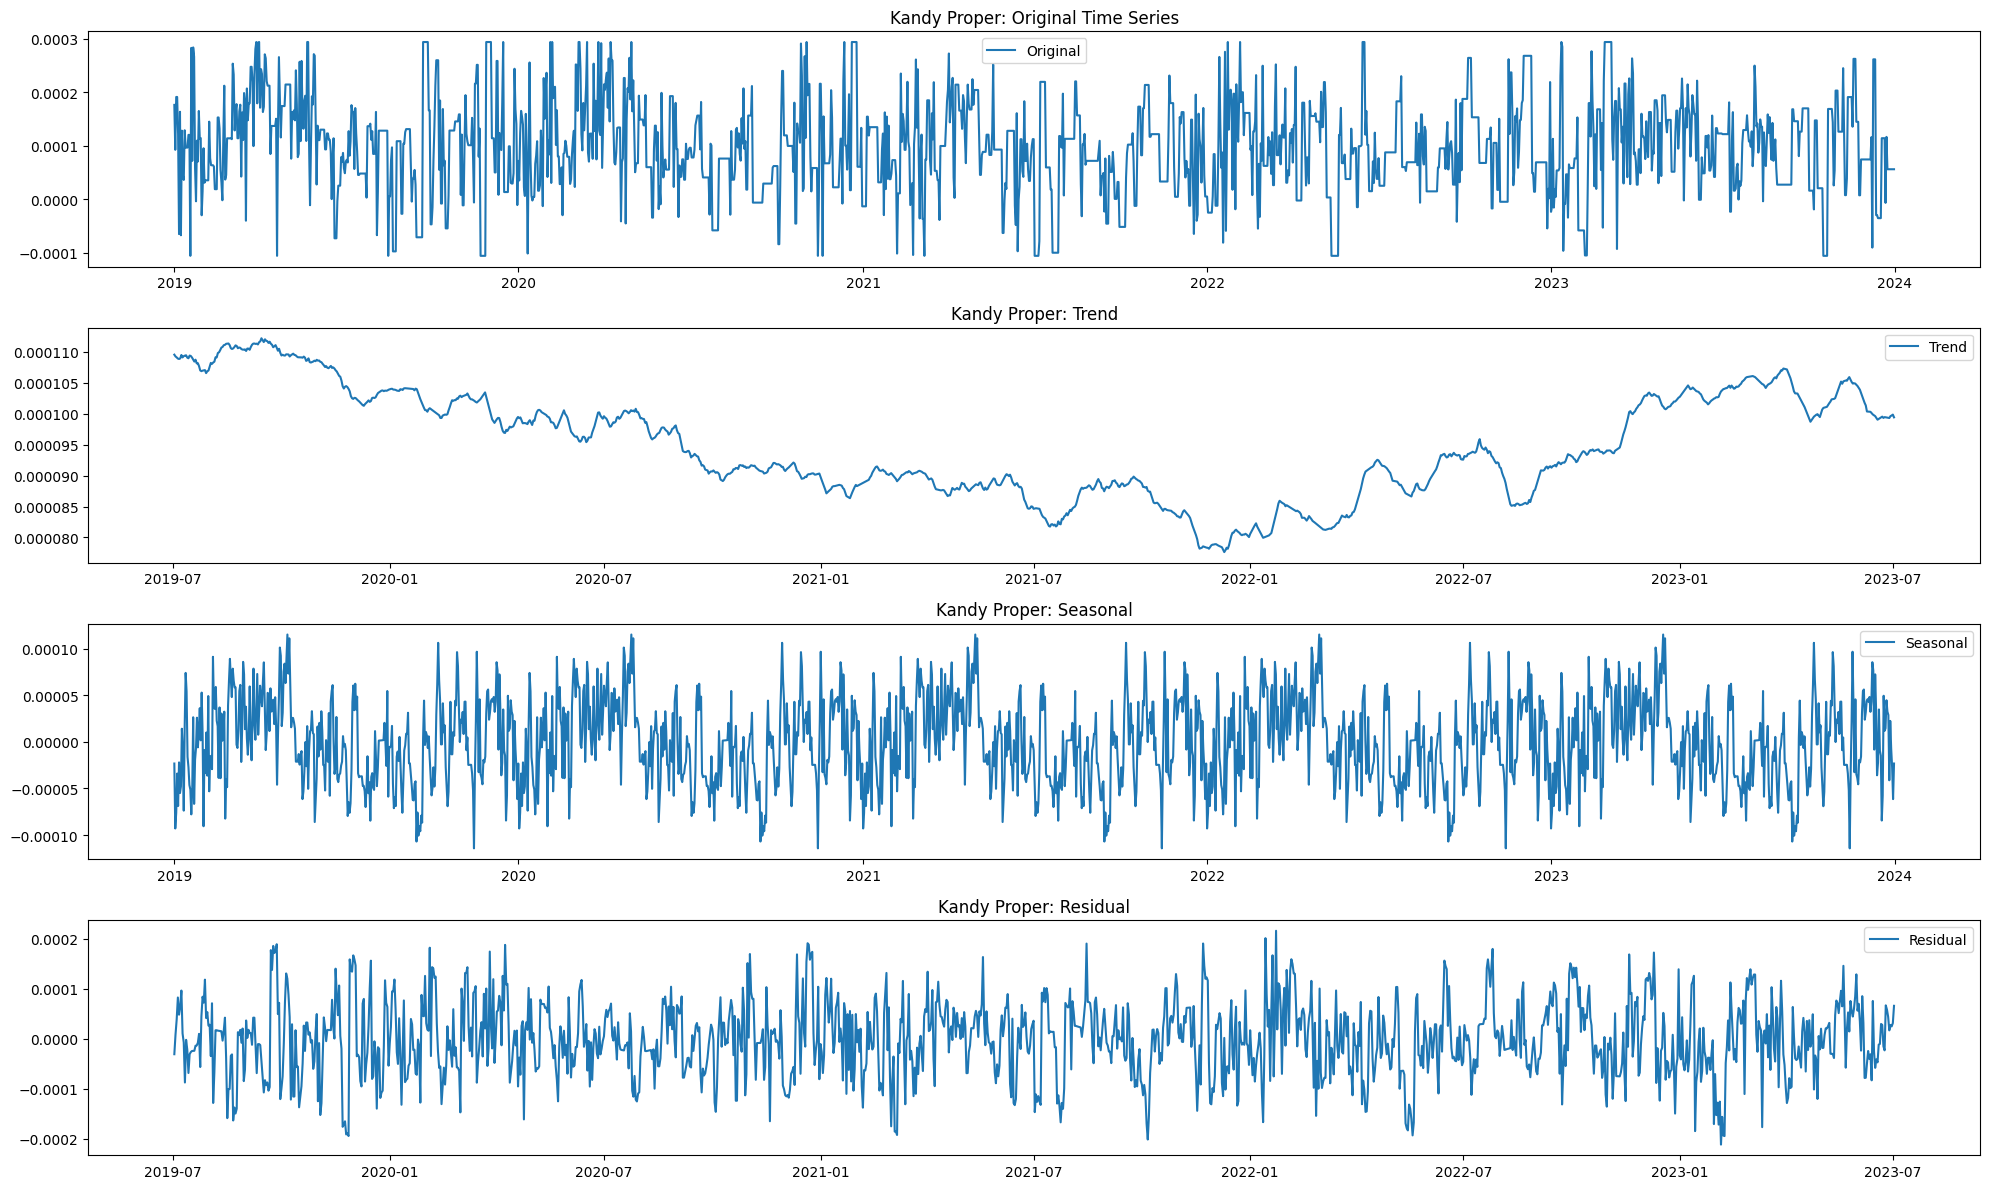

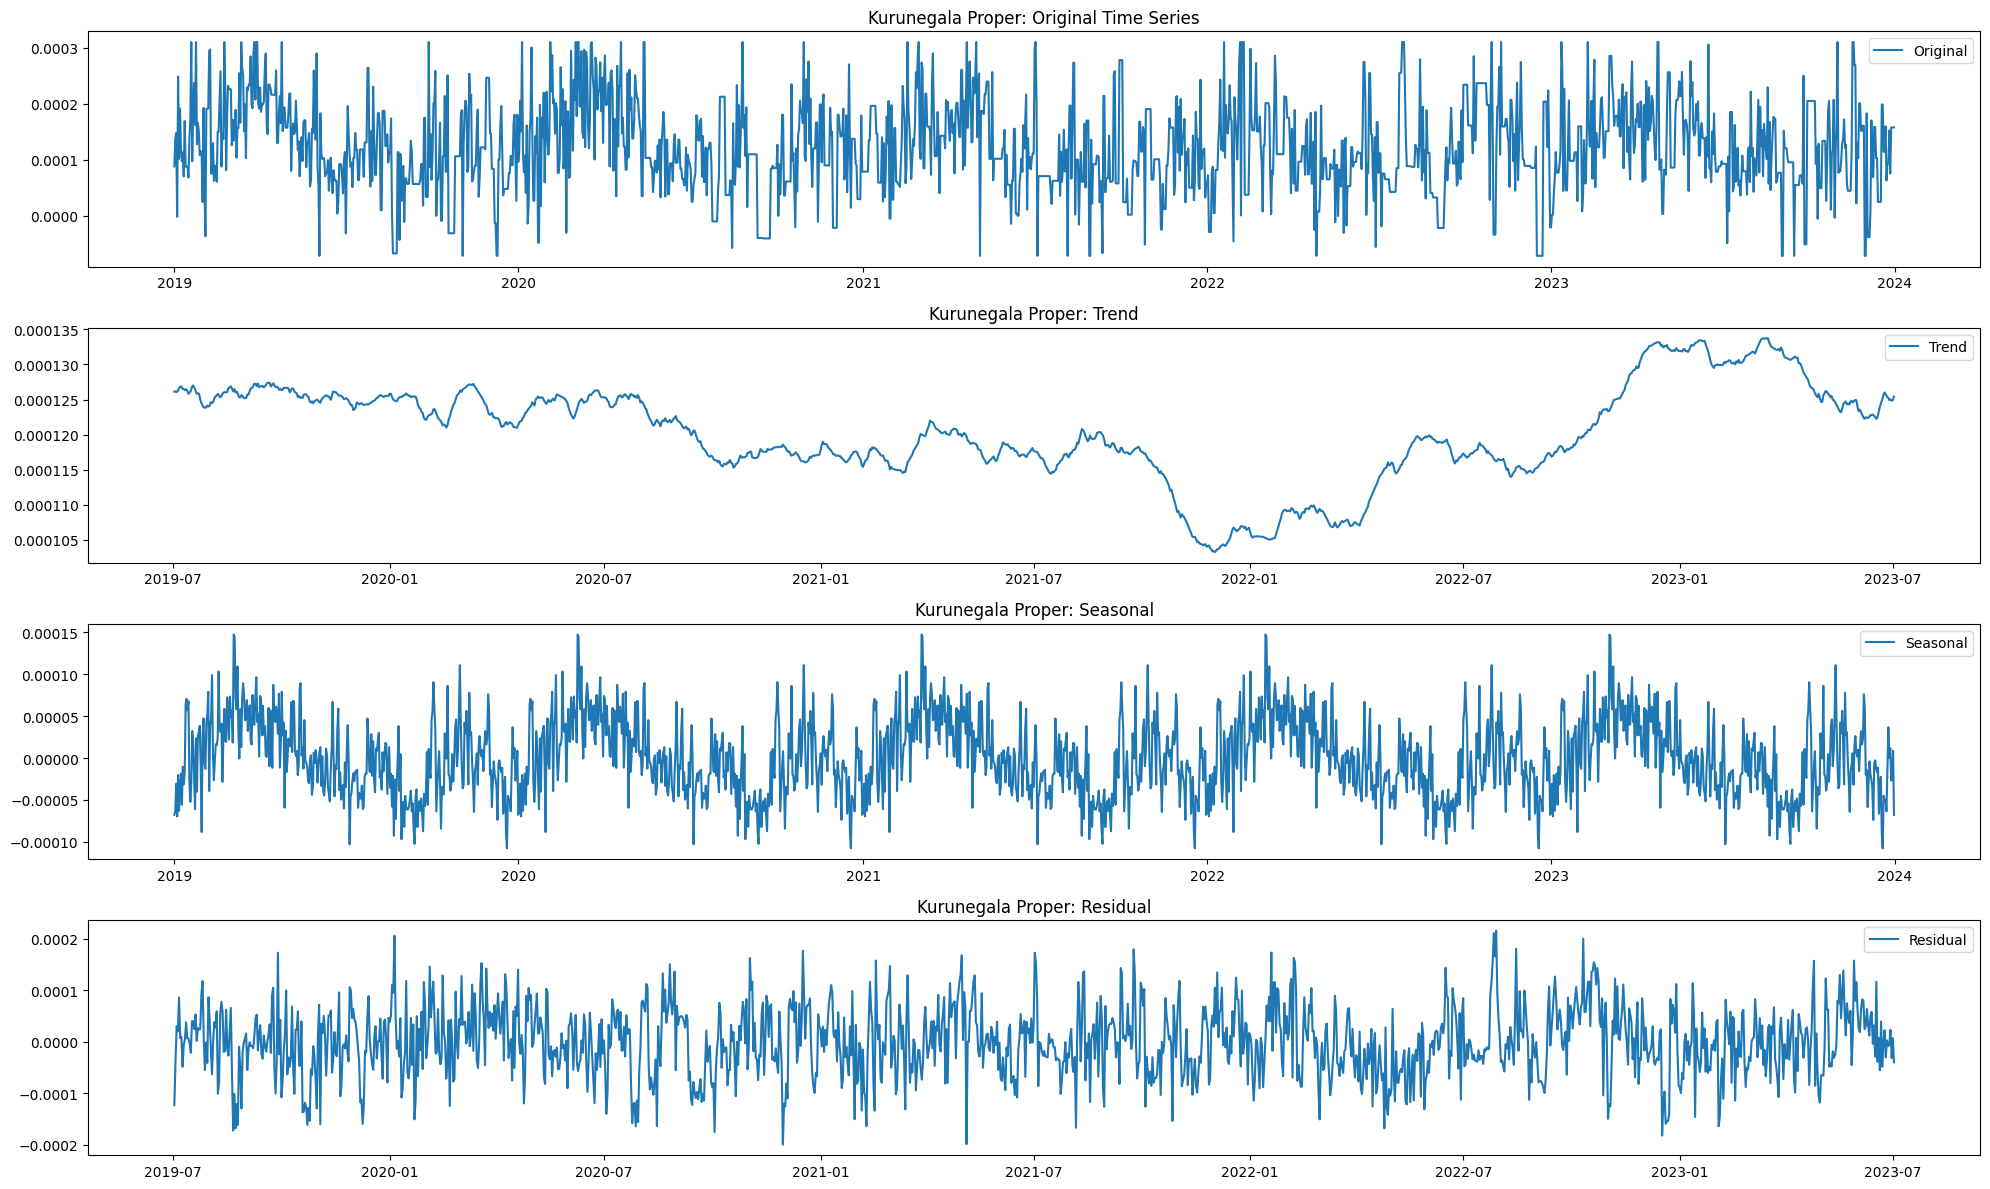

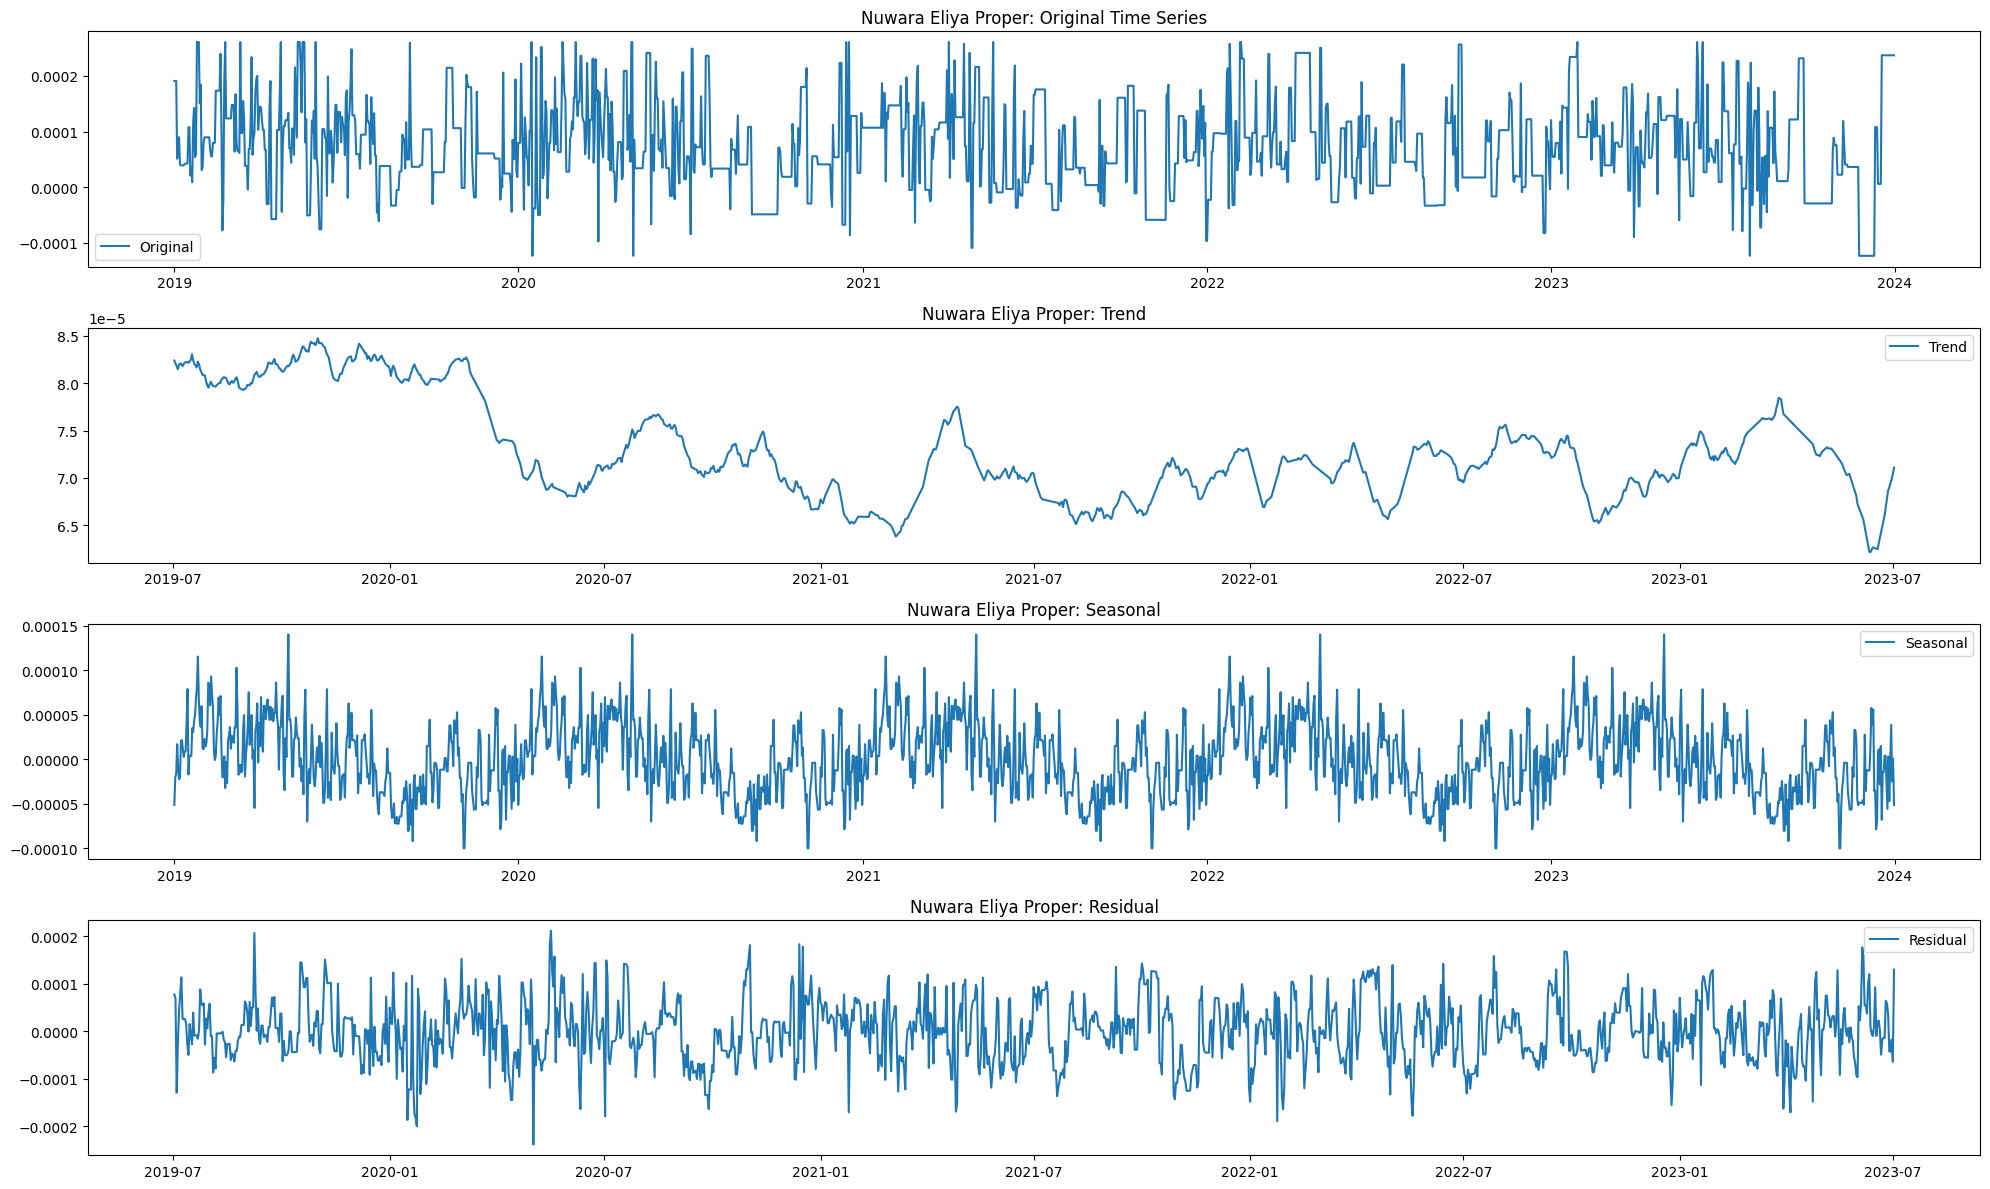

In [27]:
# Seasonal Decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# List of locations
locations = ['Bibile, Monaragala', 'Colombo Proper', 'Deniyaya, Matara', 'Jaffna Proper', 'Kandy Proper', 'Kurunegala Proper', 'Nuwara Eliya Proper']

for location in locations:
    # Filter DataFrame for the current location
    df_location = df_filtered.filter(col("Location") == location)

    # Convert Spark DataFrame to Pandas DataFrame
    pandas_df = df_location.toPandas()

    # Perform seasonal decomposition
    result = seasonal_decompose(pandas_df['HCHO_reading'], model='additive', period=365)  # Assuming yearly seasonality

    # Plot decomposed components
    plt.figure(figsize=(20, 12))

    # Original time series
    plt.subplot(411)
    plt.plot(pandas_df['Current_Date'], pandas_df['HCHO_reading'], label='Original')
    plt.legend()
    plt.title(f'{location}: Original Time Series')

    # Trend component
    plt.subplot(412)
    plt.plot(pandas_df['Current_Date'], result.trend, label='Trend')
    plt.legend()
    plt.title(f'{location}: Trend')

    # Seasonal component
    plt.subplot(413)
    plt.plot(pandas_df['Current_Date'], result.seasonal, label='Seasonal')
    plt.legend()
    plt.title(f'{location}: Seasonal')

    # Residual component
    plt.subplot(414)
    plt.plot(pandas_df['Current_Date'], result.resid, label='Residual')
    plt.legend()
    plt.title(f'{location}: Residual')

    plt.tight_layout()
    plt.show()


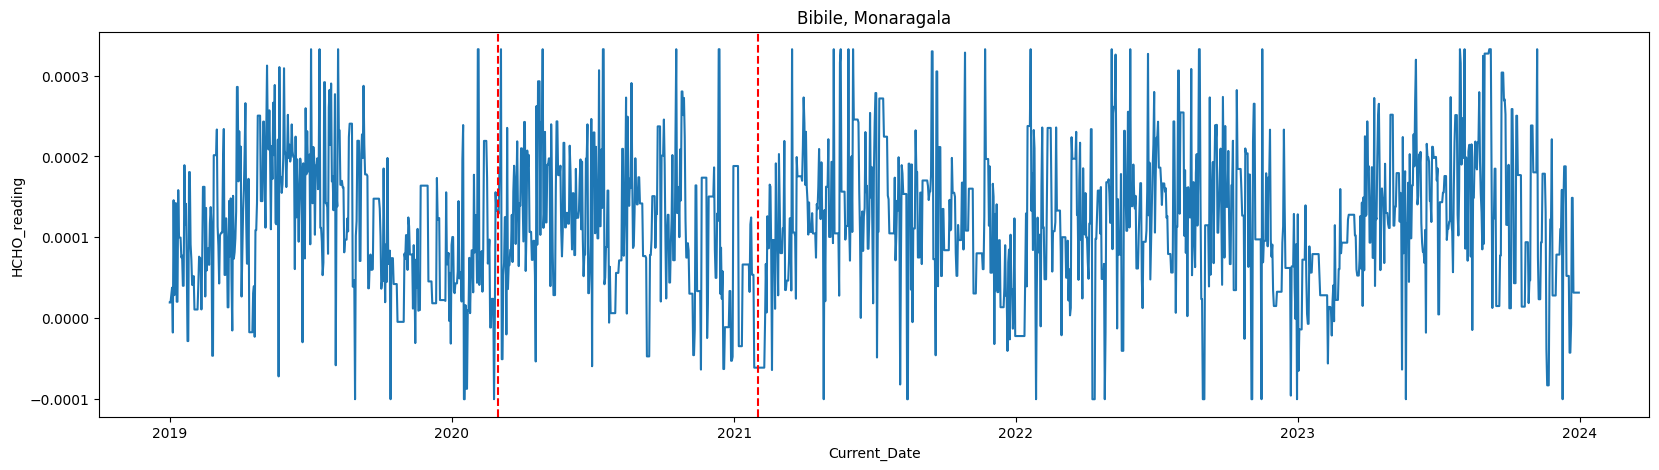

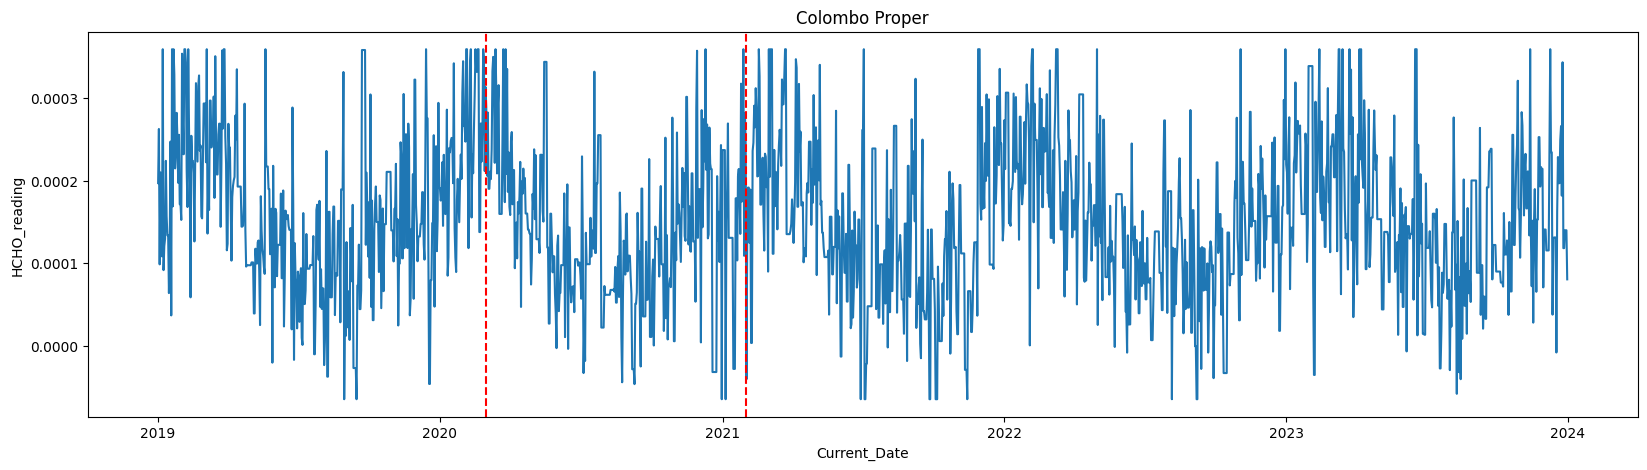

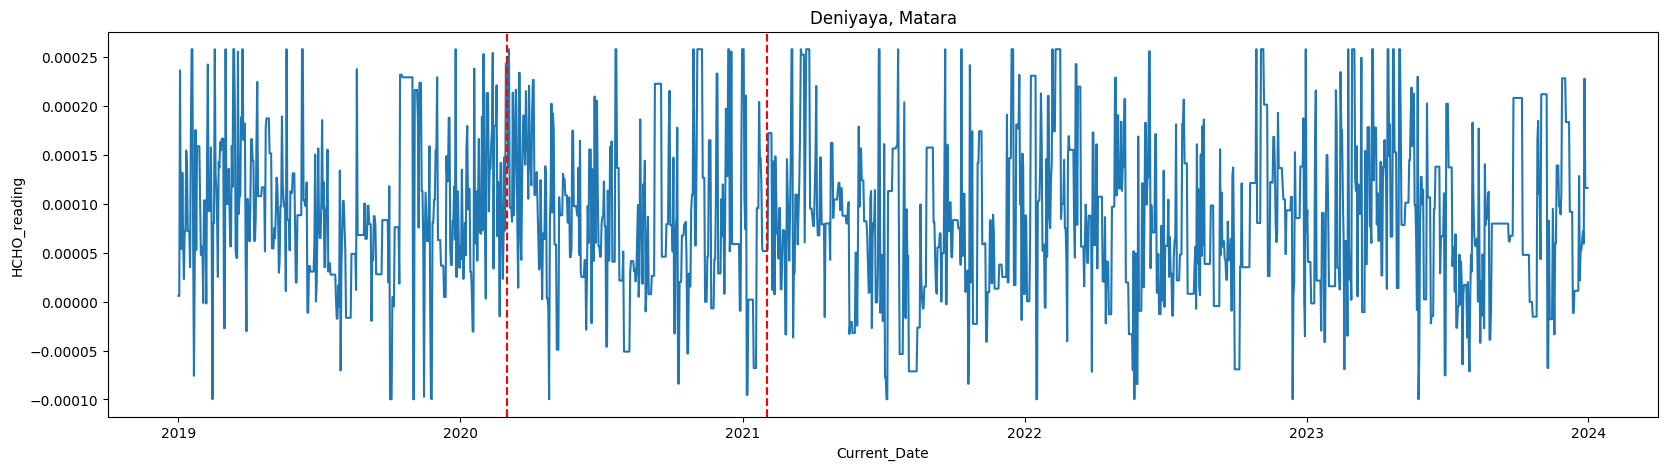

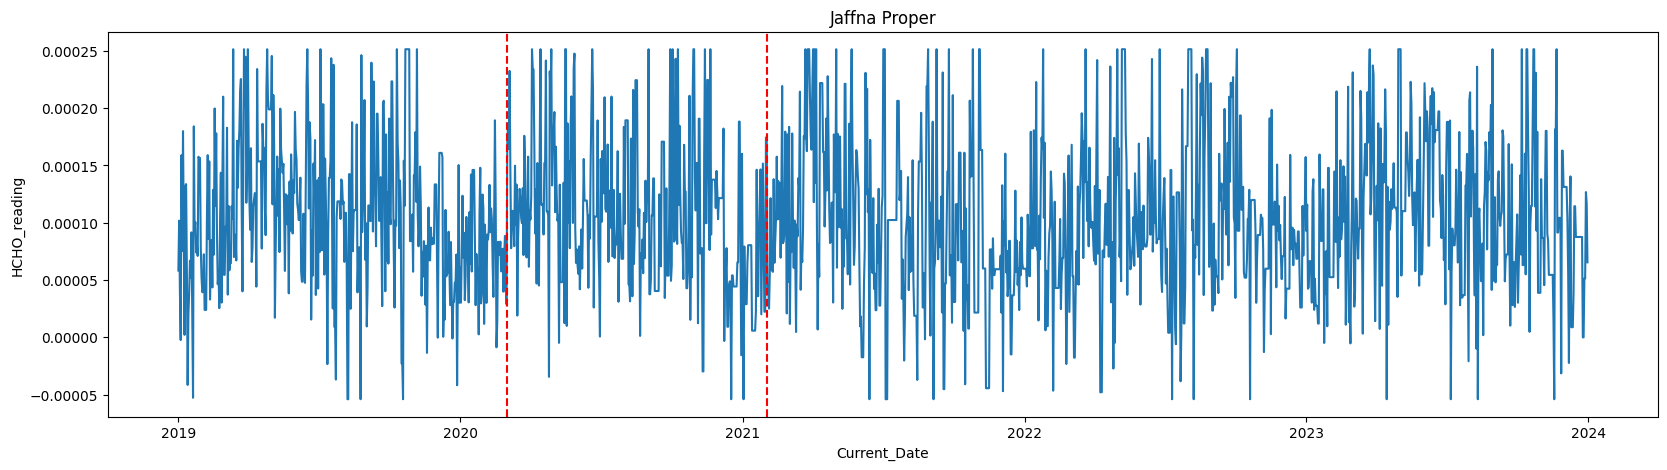

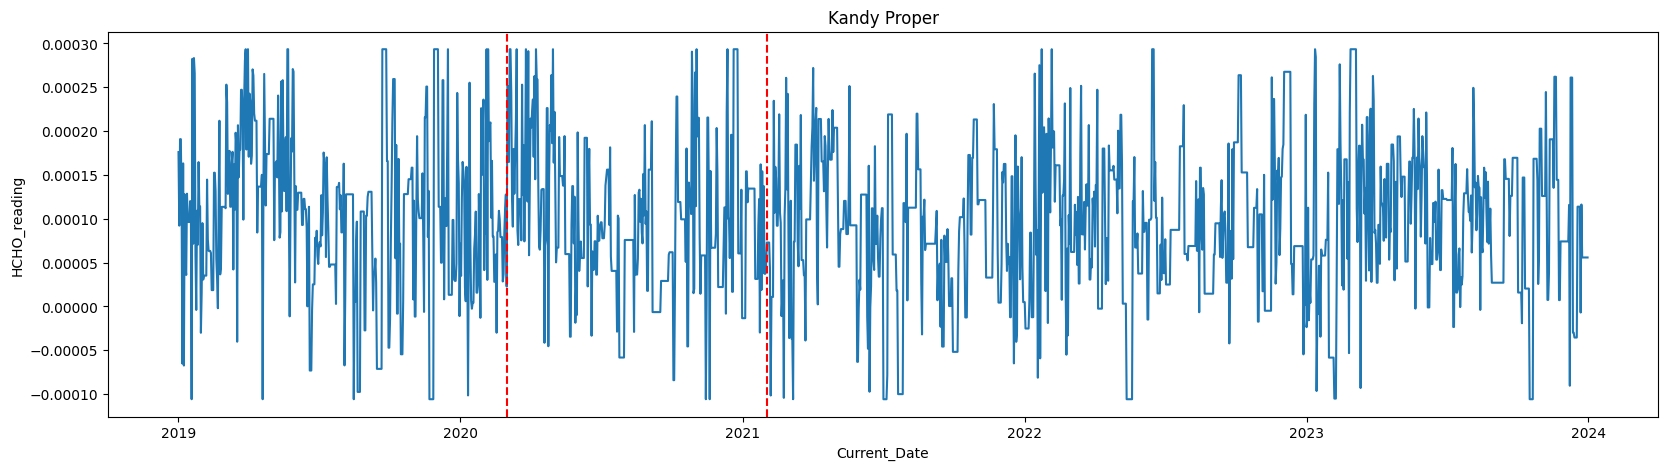

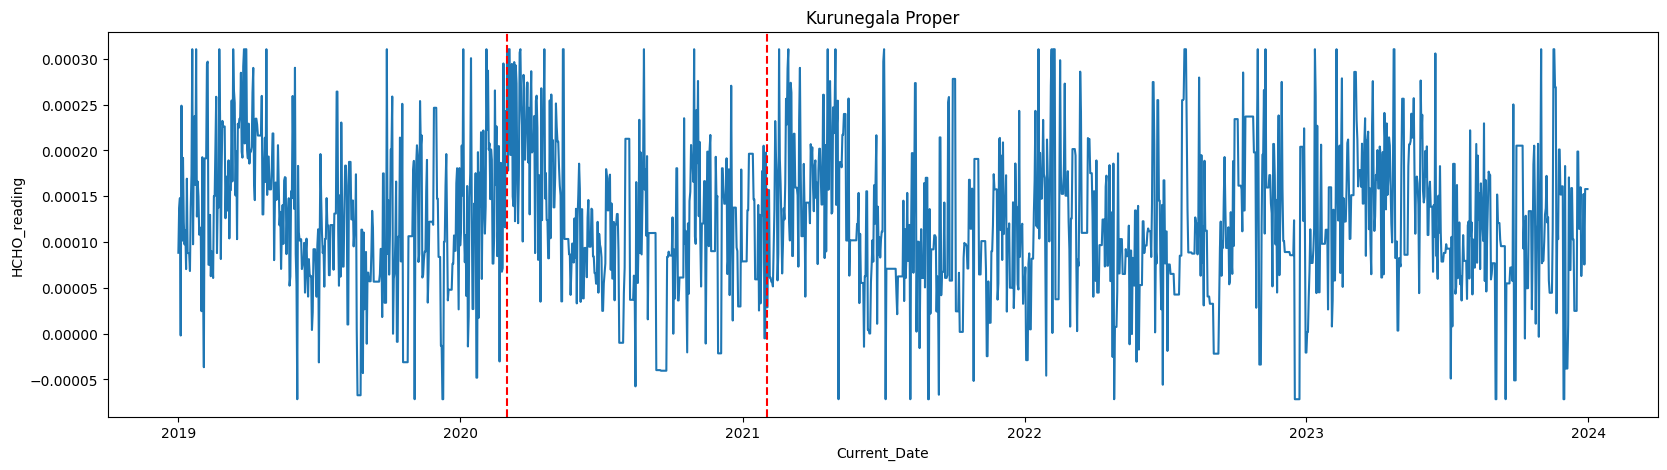

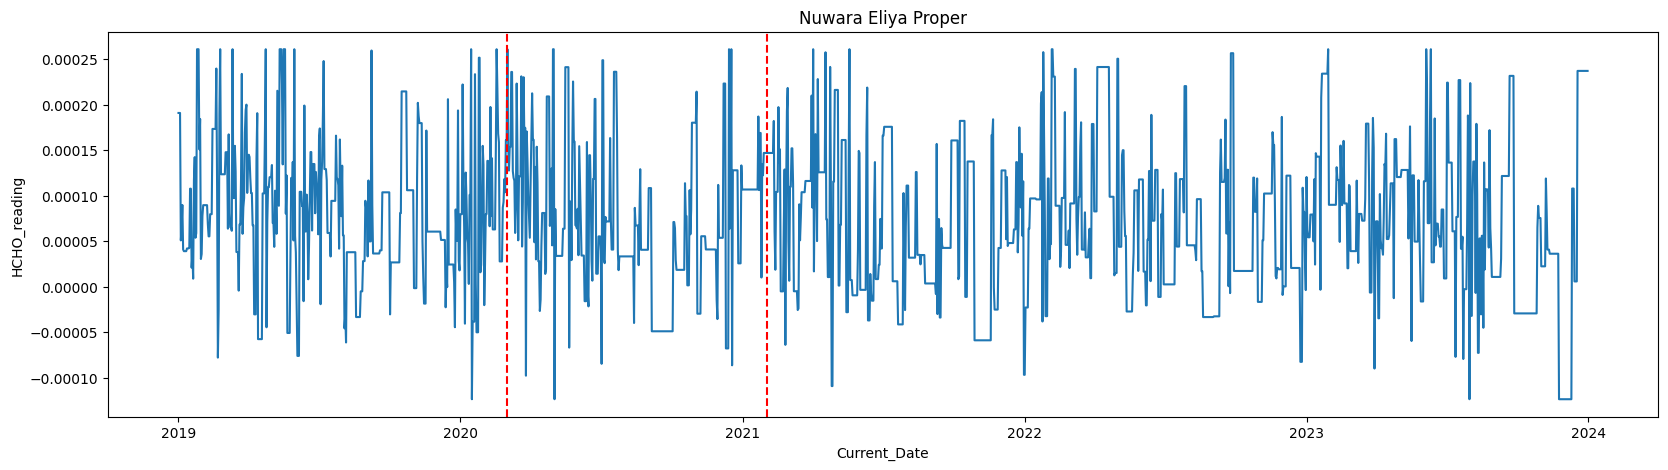

In [28]:
# Highlighting COVID-19 lockdown period

# List of locations
locations = ['Bibile, Monaragala', 'Colombo Proper', 'Deniyaya, Matara', 'Jaffna Proper', 'Kandy Proper', 'Kurunegala Proper', 'Nuwara Eliya Proper']

for location in locations:
    # Filter DataFrame for the current location
    df_location = df_filtered.filter(col("Location") == location)

    plt.figure(figsize=(20, 5))
    sns.lineplot(data=df_location.toPandas(), x='Current_Date', y='HCHO_reading')
    plt.title(f'{location}')

    # Highlighting COVID-19 lockdowns
    plt.axvline(x=pd.to_datetime('2020-03-01'), color='r', linestyle='--', label='Start of Lockdown')
    plt.axvline(x=pd.to_datetime('2021-02-01'), color='r', linestyle='--', label='End of Lockdown')

    plt.show()


In [29]:
df_filtered.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)


In [32]:
# Loading external facts dataset
data4 = spark.read.csv("/content/drive/MyDrive/DE_Dataset/climatic_dataset.csv", header=True, inferSchema=True)

In [31]:
data4.show()

+-----------+--------------+--------+---------+---------+----------+----+----+----+----+
|    STATION|          NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------+--------------+--------+---------+---------+----------+----+----+----+----+
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78|NULL|  72|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-07| 0.0|  80|  89|  68|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-08| 0.0|  82|  90|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-09| 0.0|  83|  89|  71|
|CEM00043441|KURUNEGA

In [33]:
data4.printSchema()

root
 |-- STATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- DATE: date (nullable = true)
 |-- PRCP: double (nullable = true)
 |-- TAVG: integer (nullable = true)
 |-- TMAX: integer (nullable = true)
 |-- TMIN: integer (nullable = true)


In [34]:
rows_count = data4.count()
print("Number of rows:", rows_count)

Number of rows: 8745


In [36]:
# Drop unwanted columns
columns_to_drop = ["STATION", "TMAX", "TMIN"]
data4 = data4.drop(*columns_to_drop)

In [37]:
# Rename columns
data4 = data4.withColumnRenamed("NAME", "Location") \
             .withColumnRenamed("DATE", "Current_Date") \
             .withColumnRenamed("PRCP", "Precipitation") \
             .withColumnRenamed("TAVG", "Average_Temperature")

In [38]:
data4.printSchema()

root
 |-- Location: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Average_Temperature: integer (nullable = true)


In [39]:
# Get unique values in the "Location" column
unique_values = df_filtered.select("Location").distinct()

# Show the unique values
unique_values.show()

+-------------------+
|           Location|
+-------------------+
| Bibile, Monaragala|
|     Colombo Proper|
|   Deniyaya, Matara|
|      Jaffna Proper|
|       Kandy Proper|
|  Kurunegala Proper|
|Nuwara Eliya Proper|
+-------------------+


In [40]:
# Get unique values in the "Location" column
unique_values = data4.select("Location").distinct()

# Show the unique values
unique_values.show()

+----------------+
|        Location|
+----------------+
|  KURUNEGALA, CE|
|    PUTTALAM, CE|
|     COLOMBO, CE|
|NUWARA ELIYA, CE|
|   CHINA BAY, CE|
+----------------+


In [41]:
# Renaming data in Location column
renamed_data4 = data4.withColumn("Location",
                                            when(col("Location") == "KURUNEGALA, CE", "Kurunegala Proper")
                                            .when(col("Location") == "COLOMBO, CE", 'Colombo Proper')
                                            .when(col("Location") == "NUWARA ELIYA, CE", 'Nuwara Eliya Proper')
                                            .otherwise(col("Location")))

In [42]:
renamed_data4.show()

+-----------------+--------+---------+---------+------------+-------------+-------------------+
|         Location|LATITUDE|LONGITUDE|ELEVATION|Current_Date|Precipitation|Average_Temperature|
+-----------------+--------+---------+---------+------------+-------------+-------------------+
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-02|          0.0|                 78|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-03|          0.0|                 81|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-04|          0.0|                 83|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-05|          0.0|                 84|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-06|          0.0|                 82|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-07|          0.0|                 80|
|Kurunegala Proper|   7.467|   80.367|    116.0|  2019-01-08|          0.0|                 82|
|Kurunegala Proper|   7.467|   80.367|  

In [43]:
# Count null values for each column
null_counts = renamed_data4.select([sum(col(c).isNull().cast("int")).alias(c) for c in data4.columns])

# Show null value counts for each column
null_counts.show()

+--------+--------+---------+---------+------------+-------------+-------------------+
|Location|LATITUDE|LONGITUDE|ELEVATION|Current_Date|Precipitation|Average_Temperature|
+--------+--------+---------+---------+------------+-------------+-------------------+
|       0|       0|        0|        0|           0|           37|                  0|
+--------+--------+---------+---------+------------+-------------+-------------------+


In [44]:
# Handling Null values

from pyspark.sql.functions import *
from pyspark.sql.window import Window

# Define window partitioned by 'Location' column
window = Window.partitionBy('Location').orderBy('Current_Date')

# Forward fill
forward_filled_Precipitation = last(renamed_data4['Precipitation'], ignorenulls=True).over(window.rowsBetween(Window.unboundedPreceding, 0))

# Replace the 'Precipitation' column with forward-filled values
renamed_data4 = renamed_data4.withColumn('Precipitation', forward_filled_Precipitation)

# Backward fill
backward_filled_Precipitation = first(renamed_data4['Precipitation'], ignorenulls=True).over(window.rowsBetween(0, Window.unboundedFollowing))

# Replace the 'Precipitation' column with backward-filled values
renamed_data4 = renamed_data4.withColumn('Precipitation', backward_filled_Precipitation)

# Show the result
renamed_data4.show()

+-------------+--------+---------+---------+------------+-------------+-------------------+
|     Location|LATITUDE|LONGITUDE|ELEVATION|Current_Date|Precipitation|Average_Temperature|
+-------------+--------+---------+---------+------------+-------------+-------------------+
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-01|         0.03|                 79|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-02|          0.0|                 78|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-03|          0.0|                 79|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-04|          0.0|                 79|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-05|          0.0|                 79|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-06|          0.0|                 80|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-07|          0.0|                 79|
|CHINA BAY, CE|   8.539|   81.182|      1.8|  2019-01-08|          0.0|         

In [45]:
# Count null values for each column
null_counts = renamed_data4.select([sum(col(c).isNull().cast("int")).alias(c) for c in data4.columns])

# Show null value counts for each column
null_counts.show()

+--------+--------+---------+---------+------------+-------------+-------------------+
|Location|LATITUDE|LONGITUDE|ELEVATION|Current_Date|Precipitation|Average_Temperature|
+--------+--------+---------+---------+------------+-------------+-------------------+
|       0|       0|        0|        0|           0|            0|                  0|
+--------+--------+---------+---------+------------+-------------+-------------------+


In [46]:
# Merging two dataframes into one
joins_cols = ["Location", "Current_Date"]

merged_df = df_filtered.join(renamed_data4, joins_cols, "inner")

merged_df.show()

+--------------+------------+--------------------+----------+--------+---------+---------+-------------+-------------------+
|      Location|Current_Date|        HCHO_reading| Next_Date|LATITUDE|LONGITUDE|ELEVATION|Precipitation|Average_Temperature|
+--------------+------------+--------------------+----------+--------+---------+---------+-------------+-------------------+
|Colombo Proper|  2019-01-01|1.969834395781014...|2019-01-02|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-02|2.625522171968594...|2019-01-03|     6.9|   79.867|      7.0|          0.0|                 78|
|Colombo Proper|  2019-01-03|9.852118897938794E-5|2019-01-04|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-04|2.099320518114242E-4|2019-01-05|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-05|1.785337298892930...|2019-01-06|     6.9|   79.867|      7.0|          0.0|                 81|


In [47]:
# Drop unwanted columns
columns_to_drop = ["Next_Date"]
merged_df = merged_df.drop(*columns_to_drop)

merged_df.show()

+--------------+------------+--------------------+--------+---------+---------+-------------+-------------------+
|      Location|Current_Date|        HCHO_reading|LATITUDE|LONGITUDE|ELEVATION|Precipitation|Average_Temperature|
+--------------+------------+--------------------+--------+---------+---------+-------------+-------------------+
|Colombo Proper|  2019-01-01|1.969834395781014...|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-02|2.625522171968594...|     6.9|   79.867|      7.0|          0.0|                 78|
|Colombo Proper|  2019-01-03|9.852118897938794E-5|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-04|2.099320518114242E-4|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-05|1.785337298892930...|     6.9|   79.867|      7.0|          0.0|                 81|
|Colombo Proper|  2019-01-06|1.082296700235670...|     6.9|   79.867|      7.0|         

In [48]:
rows_count = merged_df.count()
print("Number of rows:", rows_count)

Number of rows: 5230


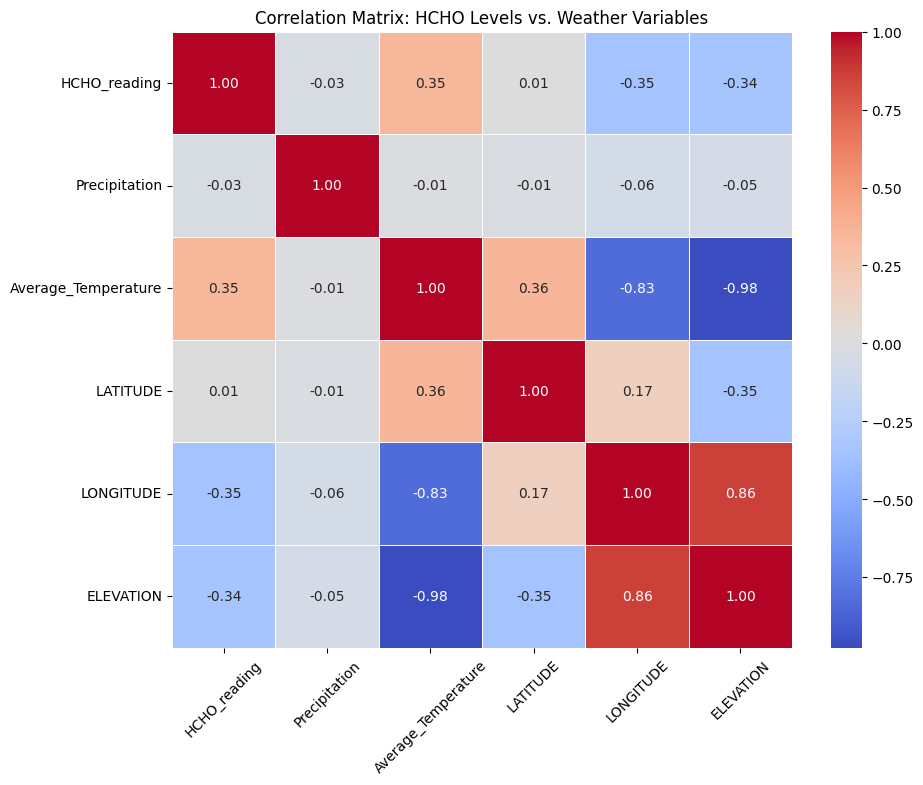

In [49]:
# Plotting correlation Heat map
merged_pd = merged_df.toPandas()

correlation_matrix = merged_pd[['HCHO_reading', 'Precipitation', 'Average_Temperature', 'LATITUDE', 'LONGITUDE', 'ELEVATION']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: HCHO Levels vs. Weather Variables')
plt.xticks(rotation=45)
plt.show()

In [50]:
merged_df.printSchema()

root
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- HCHO_reading: double (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Average_Temperature: integer (nullable = true)


In [51]:
# Get unique values in the "ELEVATION" column
unique_values = merged_df.select("Location", "ELEVATION").distinct()

# Show the unique values
unique_values.show()

+-------------------+---------+
|           Location|ELEVATION|
+-------------------+---------+
|     Colombo Proper|      7.0|
|  Kurunegala Proper|    116.0|
|Nuwara Eliya Proper|   1880.0|
+-------------------+---------+


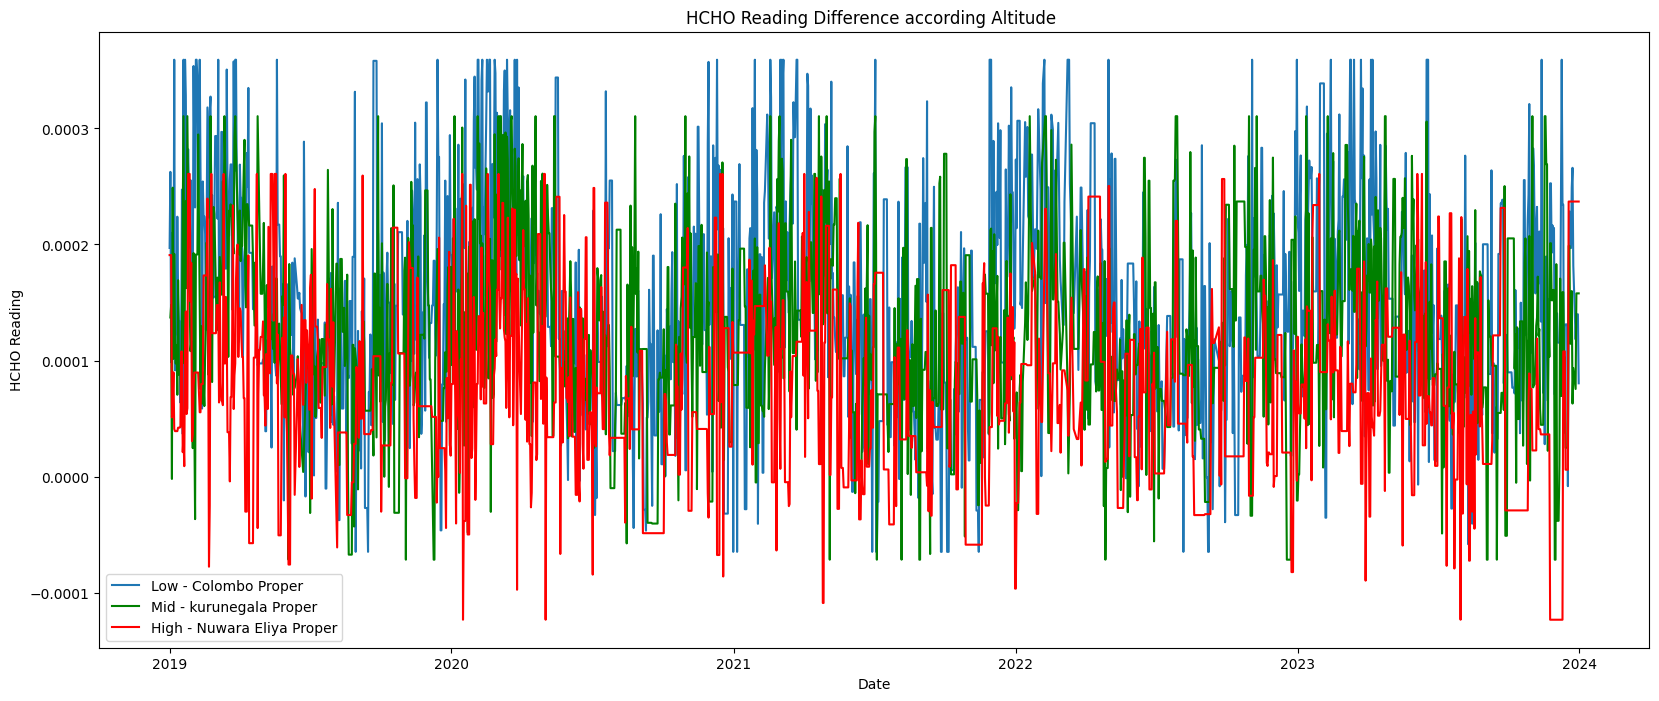

In [52]:
# The HCHO Difference between low lying cities and high lying cities

# Select cities with low elevation
colombo = merged_df.filter(col("Location") == "Colombo Proper").toPandas()

# Convert 'Current_Date' to datetime and set as index
colombo['Current_Date'] = pd.to_datetime(colombo['Current_Date'])
colombo.set_index('Current_Date', inplace=True)


# Select cities with mid elevation
kurunegala = merged_df.filter(col("Location") == "Kurunegala Proper").toPandas()

# Convert 'Current_Date' to datetime and set as index
kurunegala['Current_Date'] = pd.to_datetime(kurunegala['Current_Date'])
kurunegala.set_index('Current_Date', inplace=True)


# Select cities with high elevation
nuwara_eliya = merged_df.filter(col("Location") == "Nuwara Eliya Proper").toPandas()

# Convert 'Current_Date' to datetime and set as index
nuwara_eliya['Current_Date'] = pd.to_datetime(nuwara_eliya['Current_Date'])
nuwara_eliya.set_index('Current_Date', inplace=True)


# Plot model predictions
plt.figure(figsize=(20, 8))
plt.plot(colombo.index, colombo['HCHO_reading'], label='Low - Colombo Proper')
plt.plot(kurunegala.index, kurunegala['HCHO_reading'], color='green', label='Mid - kurunegala Proper')
plt.plot(nuwara_eliya.index, nuwara_eliya['HCHO_reading'], color='red', label='High - Nuwara Eliya Proper')
plt.title(f'HCHO Reading Difference according Altitude ')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

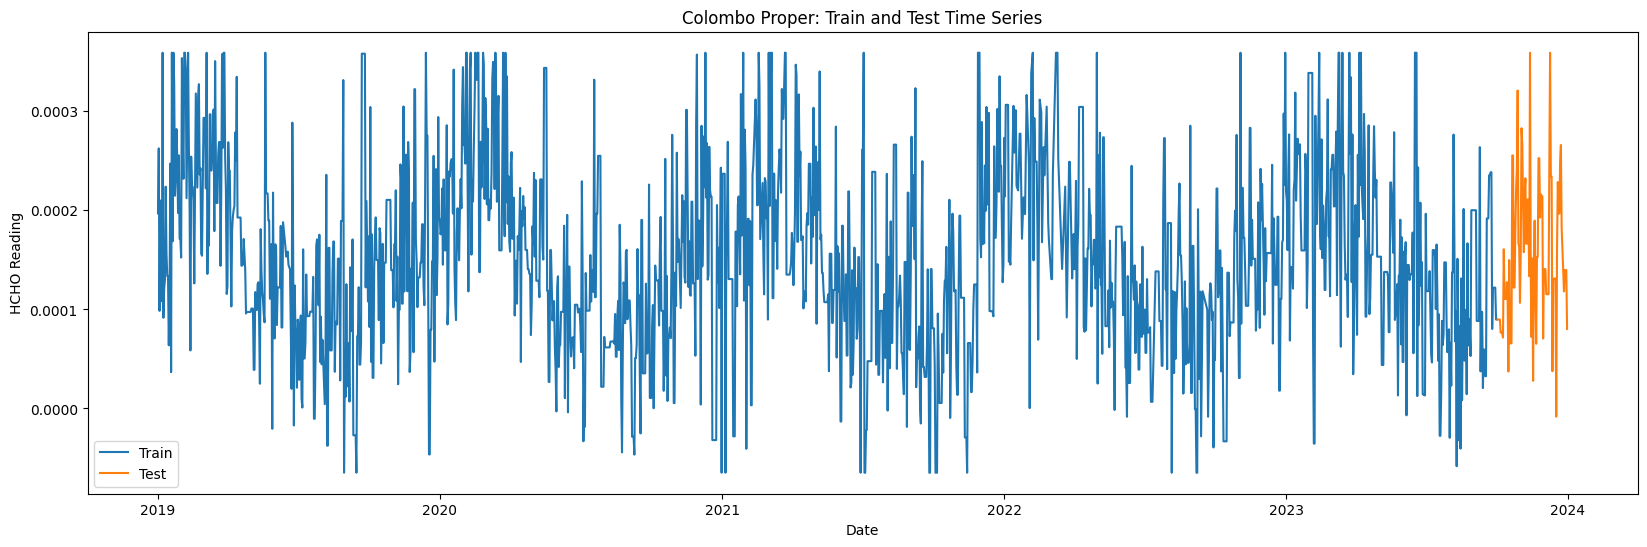

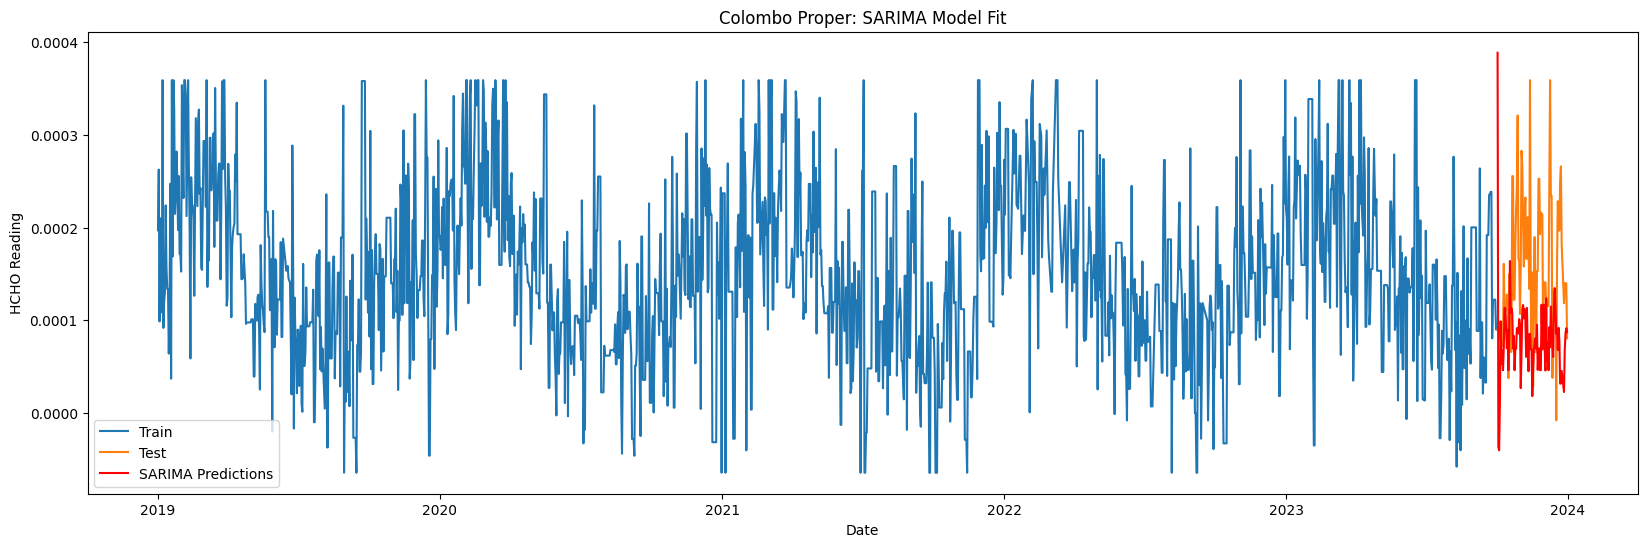

Metrics for Colombo Proper:
MSE: 1.3433438104734688e-08
R-squared: -1.5740450128831238
MAE: 9.30267118181487e-05


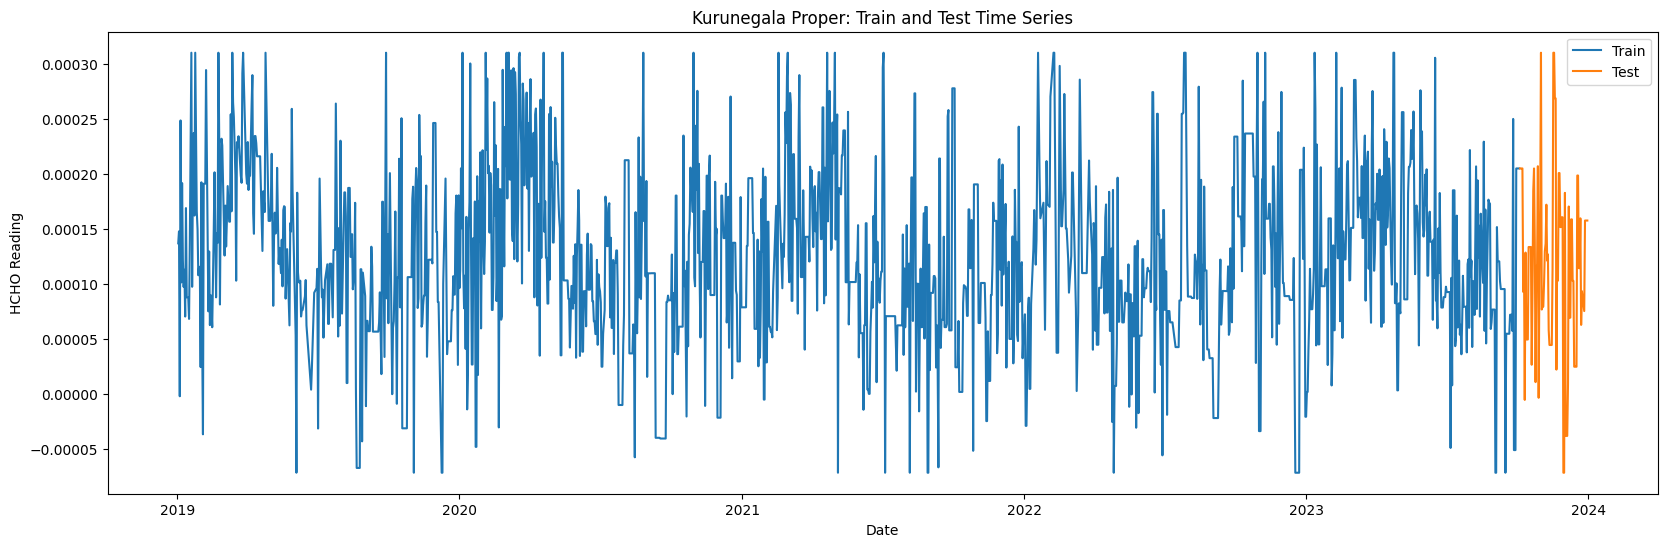

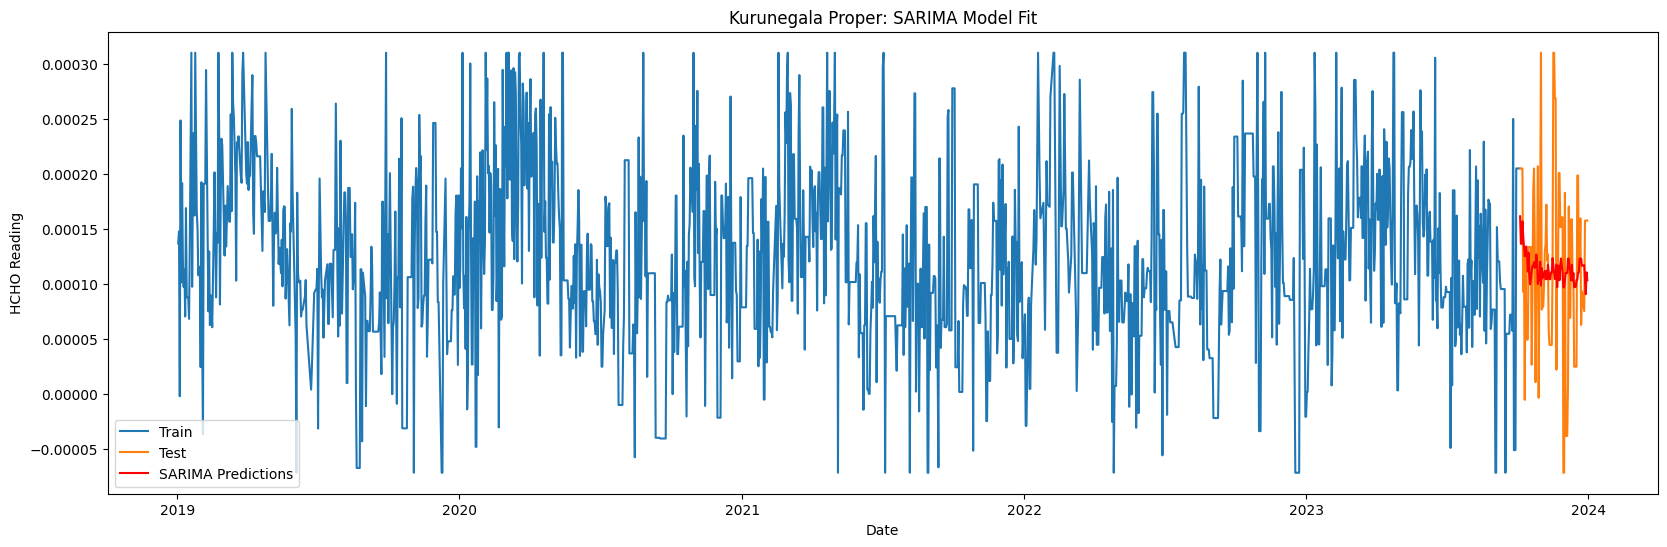

Metrics for Kurunegala Proper:
MSE: 6.5033480726671986e-09
R-squared: 0.022874098700192413
MAE: 6.368880406380037e-05


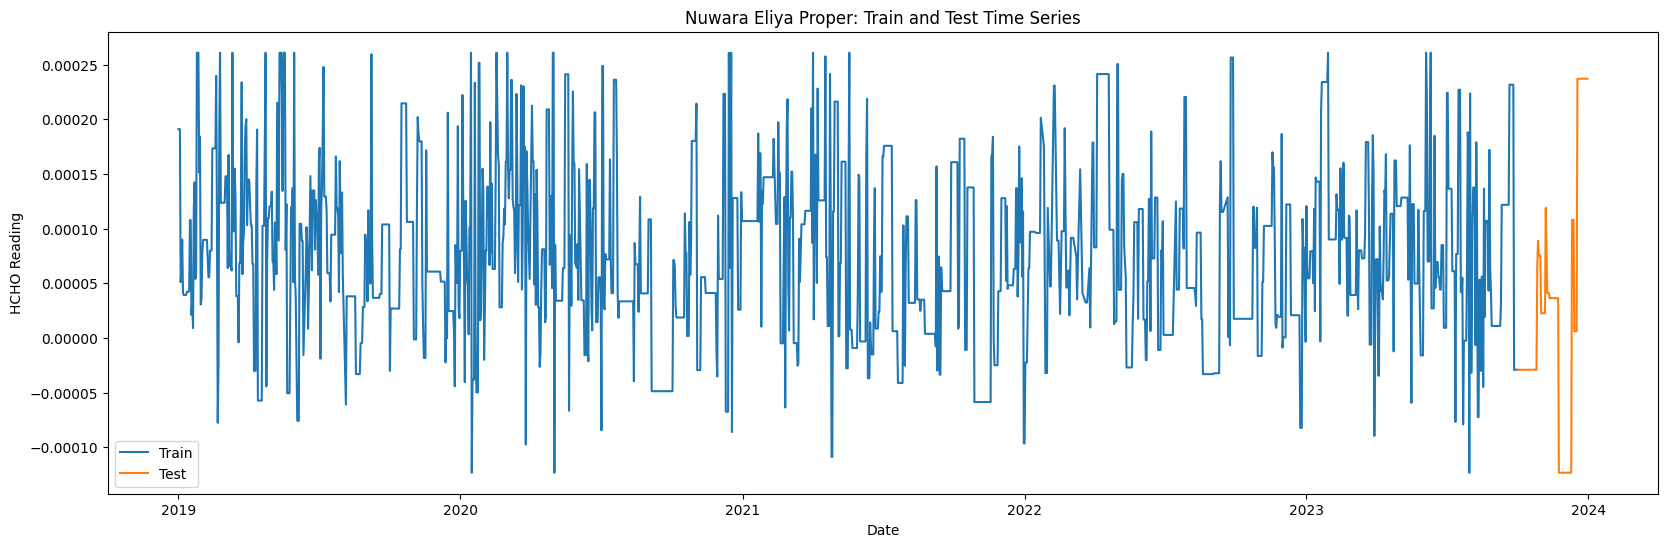

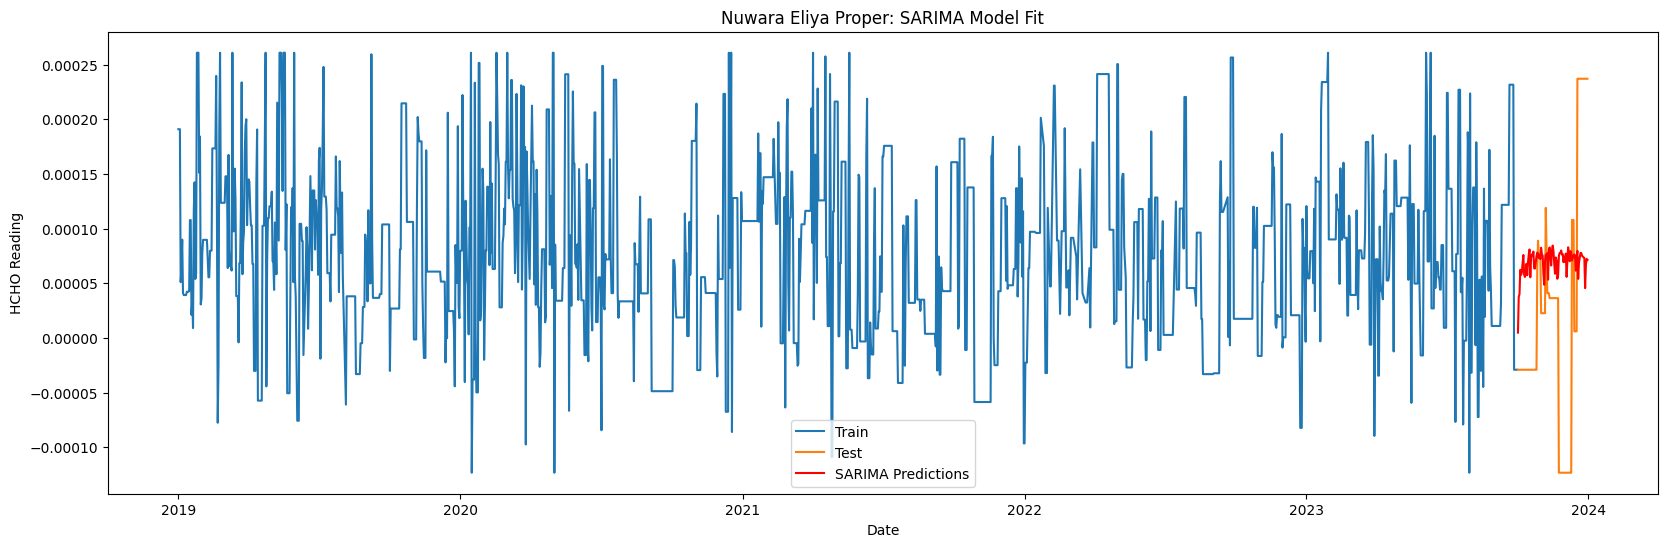

Metrics for Nuwara Eliya Proper:
MSE: 1.4313404695975252e-08
R-squared: -0.2333921227784177
MAE: 9.981307507556583e-05


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Define lists to store evaluation metrics
mse_scores = []
r2_scores = []
mae_scores = []

# Select distinct values in the "Location" column
location_list = merged_df.select("Location").distinct().rdd.map(lambda row: row[0]).collect()

for city in location_list:
    # Select data for a specific city
    city_data = merged_df.filter(col("Location") == city).toPandas()

    # Convert 'Current_Date' to datetime and set as index
    city_data['Current_Date'] = pd.to_datetime(city_data['Current_Date'])
    city_data.set_index('Current_Date', inplace=True)

    # Split data into train and test sets (95% train, 5% test)
    train_data, test_data = train_test_split(city_data, test_size=0.05, shuffle=False)

    # Plot original time series for train and test sets
    plt.figure(figsize=(20, 6))
    plt.plot(train_data.index, train_data['HCHO_reading'], label='Train')
    plt.plot(test_data.index, test_data['HCHO_reading'], label='Test')
    plt.title(f'{city}: Train and Test Time Series')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.show()

    exog_train = train_data[['Average_Temperature', 'ELEVATION', 'Precipitation']]
    exog_test = test_data[['Average_Temperature', 'ELEVATION', 'Precipitation']]

    # Use Auto ARIMA to find the best parameters
    model = auto_arima(train_data['HCHO_reading'], exogenous=exog_train, seasonal=True, m=12)

    # Get the best parameters
    order = model.order
    seasonal_order = model.seasonal_order

    # Fit SARIMA model
    model = SARIMAX(train_data['HCHO_reading'], exog=exog_train, order=order, seasonal_order=seasonal_order, enforce_stationary=False)
    results = model.fit()

    # Number of future time steps to forecast
    forecast_steps = len(test_data)

    # Make predictions for future time steps
    forecast = results.forecast(steps=forecast_steps, exog=exog_test)

    # Plot model predictions
    plt.figure(figsize=(20, 6))
    plt.plot(train_data.index, train_data['HCHO_reading'], label='Train')
    plt.plot(test_data.index, test_data['HCHO_reading'], label='Test')
    plt.plot(test_data.index, forecast, color='red', label='SARIMA Predictions')
    plt.title(f'{city}: SARIMA Model Fit')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    mse = mean_squared_error(test_data['HCHO_reading'], forecast)
    r2 = r2_score(test_data['HCHO_reading'], forecast)
    mae = mean_absolute_error(test_data['HCHO_reading'], forecast)

    # Store the scores
    mse_scores.append(mse)
    r2_scores.append(r2)
    mae_scores.append(mae)

    # Print or log the results
    print(f"Metrics for {city}:")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}")


In [217]:
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Save the DataFrame as a CSV file
pandas_df.to_csv("/content/drive/MyDrive/DE_Dataset/output.csv", index=False)

In [ ]:
spark.stop()